Classification problem-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the necessary library

In [308]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [174]:
df.shape

(1599, 12)

The dataset contains 1599 rows and 12 columns.

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All the columns have float data. and there no categorical data present in features.

In [176]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

list of column names

In [177]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0

Here i can see that citric acid column data has 0 values present.so we need to replace those 0 values.

In [178]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

from the above result it is pretty much clear that it is a multiclass classification problem.

here i am setting a cutoff for this classification problem is any quality at 6 and above will be termed as good/1 and anything else will considered as not good/0.

In [309]:
df.loc[df['quality']<6,'quality']=0
df.loc[df['quality']>=6,'quality']=1

Here we have converted multiclass data into binary class data.

In [310]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1599 rows x 12 columns]

In [10]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [11]:
df.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

here data looks quiet normal & balanced so we can move further with our model building. 

In [12]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

the independent features data type is float only and target variable in integer.

In [13]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [14]:
df['quality'].nunique()

2

its confirmed that in our target variable only two values are there.

In [16]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
df.isnull().sum().sum()

0

there is no null values present in the data.

<AxesSubplot:>

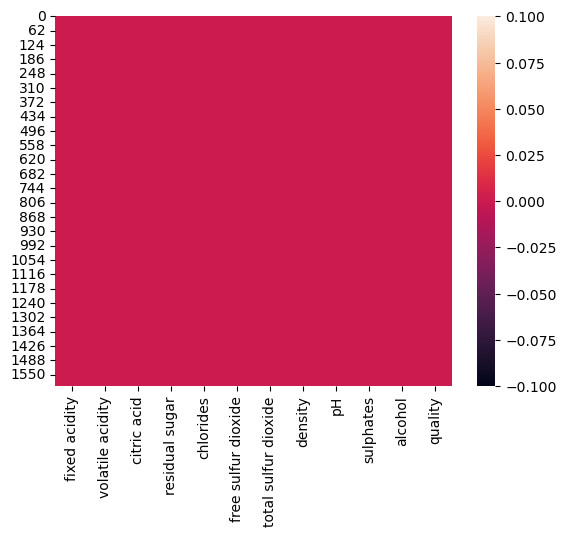

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.nunique().to_frame('No of unique values')

No of unique values
fixed acidity                          96
volatile acidity                      143
citric acid                            80
residual sugar                         91
chlorides                             153
free sulfur dioxide                    60
total sulfur dioxide                  144
density                               436
pH                                     89
sulphates                              96
alcohol                                65
quality                                 2

In [20]:
df['citric acid']=df['citric acid'].replace(0,df['citric acid'].mean())
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700     0.270976             1.9      0.076   
1               7.8             0.880     0.270976             2.6      0.098   
2               7.8             0.760     0.040000             2.3      0.092   
3              11.2             0.280     0.560000             1.9      0.075   
4               7.4             0.700     0.270976             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600     0.080000             2.0      0.090   
1595            5.9             0.550     0.100000             2.2      0.062   
1596            6.3             0.510     0.130000             2.3      0.076   
1597            5.9             0.645     0.120000             2.0      0.075   
1598            6.0             0.310     0.470000             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1599 rows x 12 columns]

Here we have replaced zeros with the column mean.

In [21]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.293345        2.538806   
std         1.741096          0.179060     0.177148        1.409928   
min         4.600000          0.120000     0.010000        0.900000   
25%         7.100000          0.390000     0.150000        1.900000   
50%         7.900000          0.520000     0.270976        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     0.534709  
std       0.154386     0.169507     1.065668     0.498950  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     1.000000  
75%       3.400000     0.730000    11.100000     1.000000  
max       4.010000     2.000000    14.900000     1.000000

Observations-

1. Here we can see that count is same in all columns so no null values present in the data set.
2. Mean is greater than median in fixed acidity,citric acid,residual sugar,chlorides,free sulphur dioxide,total sulphur dioxide,
sulphates column, so in these columns data is right skewed.
3. there is huge difference bw 75% and maximum in fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,
total sulfur dioxide,sulphates & alcohol columns.

In [22]:
#Univariate analysis-

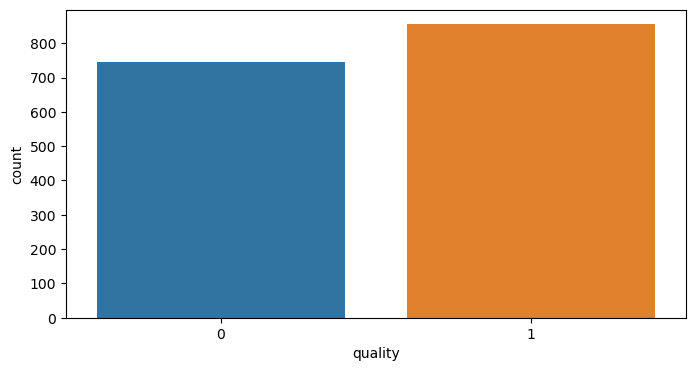

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(df['quality'])
plt.show()

Here we can see that quality 5 & 6 are more in numbers than other qualities.

In [24]:
#Bivariate analysis-

In [25]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.642707   
volatile acidity          -0.256131          1.000000    -0.491586   
citric acid                0.642707         -0.491586     1.000000   
residual sugar             0.114777          0.001918     0.130984   
chlorides                  0.093705          0.061298     0.213140   
free sulfur dioxide       -0.153794         -0.010504    -0.073963   
total sulfur dioxide      -0.113181          0.076470    -0.016469   
density                    0.668047          0.022026     0.345757   
pH                        -0.682978          0.234937    -0.477153   
sulphates                  0.183006         -0.260987     0.304037   
alcohol                   -0.061668         -0.202288     0.134029   
quality                    0.095093         -0.321441     0.158523   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.130984   0.213140            -0.073963   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                    -0.002160  -0.109494            -0.061757   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                      -0.016469  0.345757 -0.477153   0.304037   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.231963 -0.159110 -0.003264   0.218072   

                       alcohol   quality  
fixed acidity        -0.061668  0.095093  
volatile acidity     -0.202288 -0.321441  
citric acid           0.134029  0.158523  
residual sugar        0.042075 -0.002160  
chlorides            -0.221141 -0.109494  
free sulfur dioxide  -0.069408 -0.061757  
total sulfur dioxide -0.205654 -0.231963  
density              -0.496180 -0.159110  
pH                    0.205633 -0.003264  
sulphates             0.093595  0.218072  
alcohol               1.000000  0.434751  
quality               0.434751  1.000000

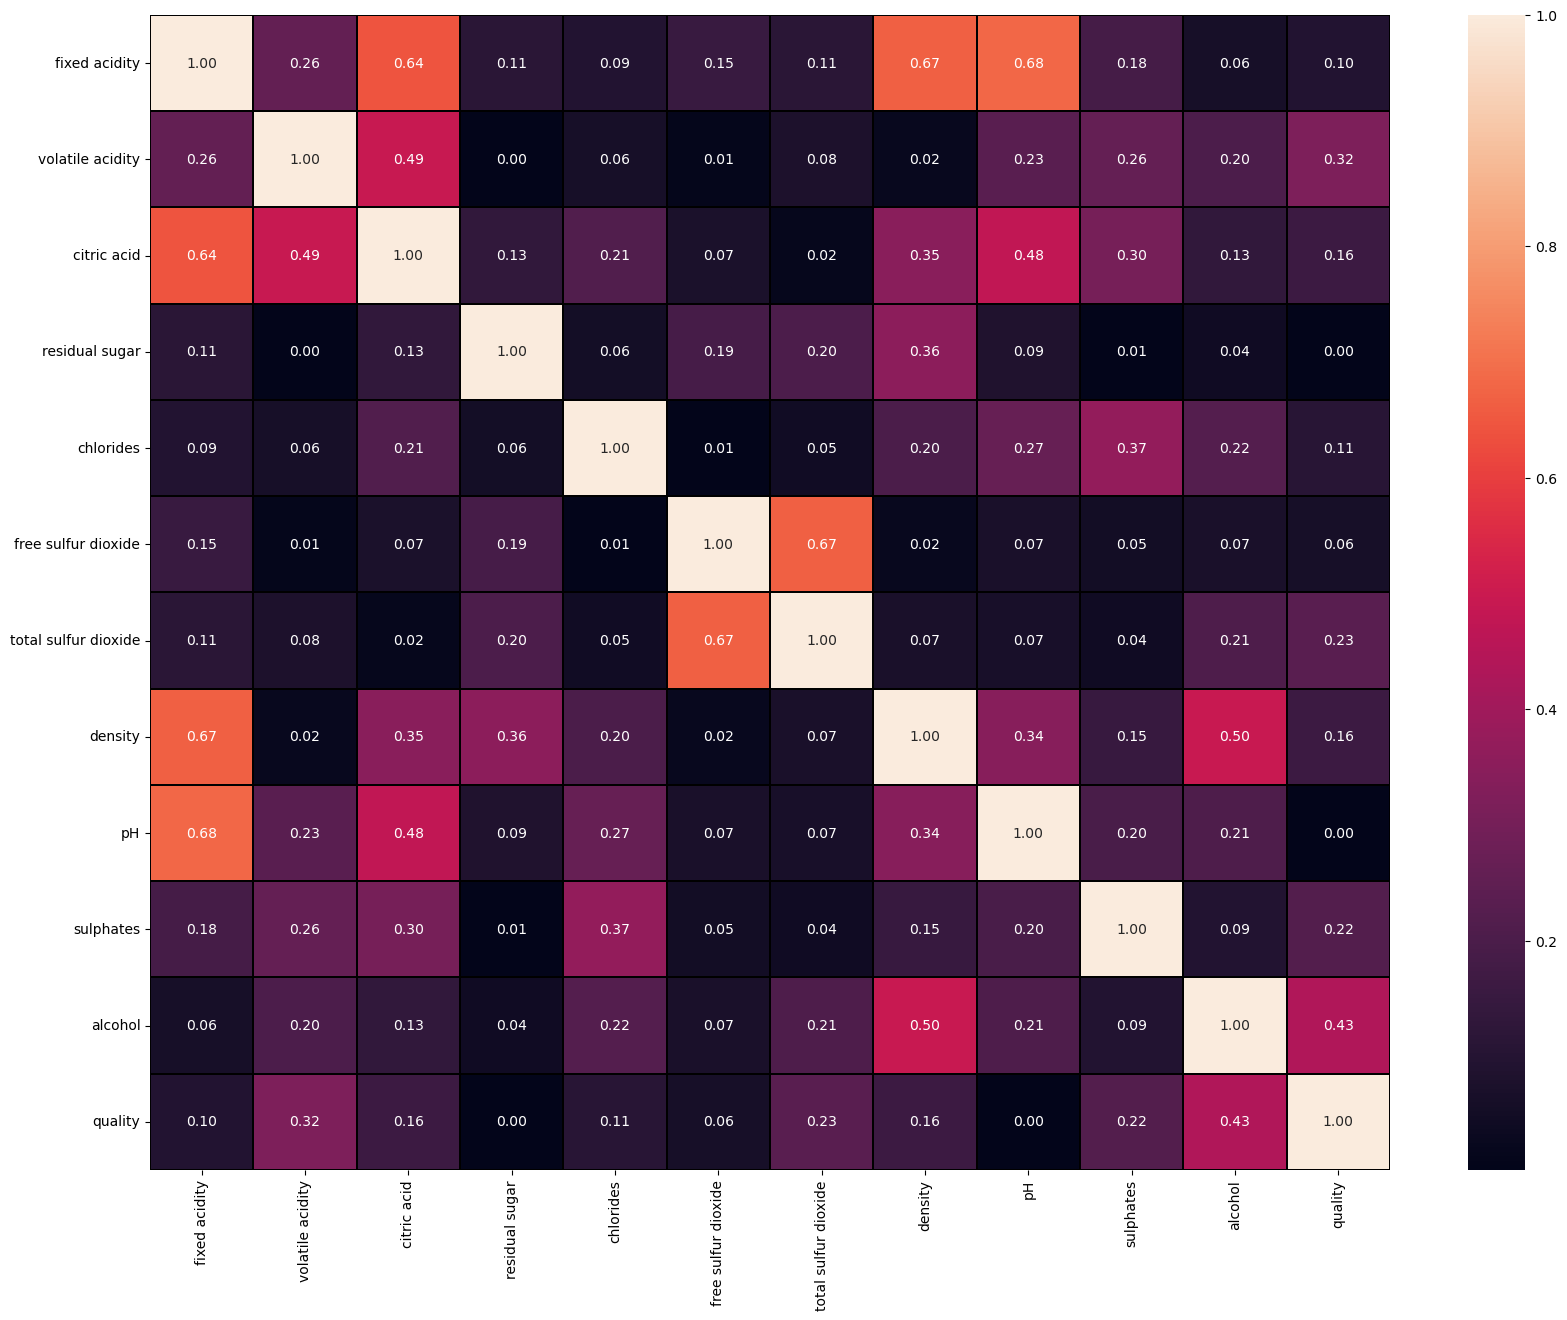

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr().abs(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2)
plt.show()

Observations-

1. Here we can see that very high correaltionship bw density & fixed acidity, PH & fixed acidity and citric acid and fixed acidity.
2. Here we can see that very high correaltionship bw PH & citric acid and citric acid & volatile acidity.
3. Here we can see that very high correaltionship bw total suphar dioxide and free suphar dioxide.
4. Here we can see that very high correaltionship bw alcohol & density.
5. Here we can see that very high correaltionship bw alcohol & Quality.
6. Here we can observe some multicollinearity issues among the features.

In [27]:
df.corr().quality

fixed acidity           0.095093
volatile acidity       -0.321441
citric acid             0.158523
residual sugar         -0.002160
chlorides              -0.109494
free sulfur dioxide    -0.061757
total sulfur dioxide   -0.231963
density                -0.159110
pH                     -0.003264
sulphates               0.218072
alcohol                 0.434751
quality                 1.000000
Name: quality, dtype: float64

1. Here we can see that alcohol & volatile acidity are the columns which are most correlated with quality(target variable.)
2. voltaile acidity is negetively correlated with target variable.
3. chlorides,total sulfur dioxide,density,PH columns are negetively correlated with target variable.
4. citric acid is also correlated with target variable.
5. residual sugar has very less correlation with target variable.
6. free sulfur dioxide also has very less correaltionship with target variable.

In [28]:
#lets plot the correlated features data-

<Figure size 2000x1500 with 0 Axes>

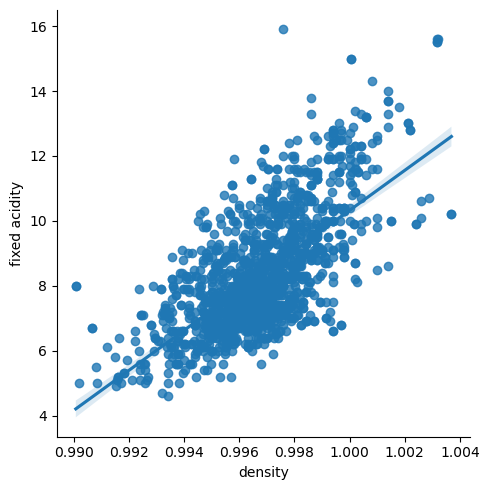

In [29]:
plt.figure(figsize=(20,15))
sns.lmplot(x='density',y='fixed acidity',data=df)
plt.show()

here we can see that density & fixed acidity columns are highly correlated with each other by 67% which is clearly seen in correlation matrix

<Figure size 2000x1500 with 0 Axes>

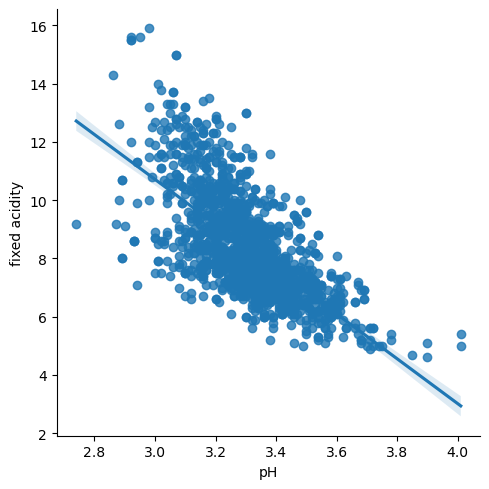

In [30]:
plt.figure(figsize=(20,15))
sns.lmplot(x='pH',y='fixed acidity',data=df)
plt.show() 

here we can see that pH & fixed acidity columns are highly correlated with each other by 68% which is clearly seen in correlation matrix

<Figure size 2000x1500 with 0 Axes>

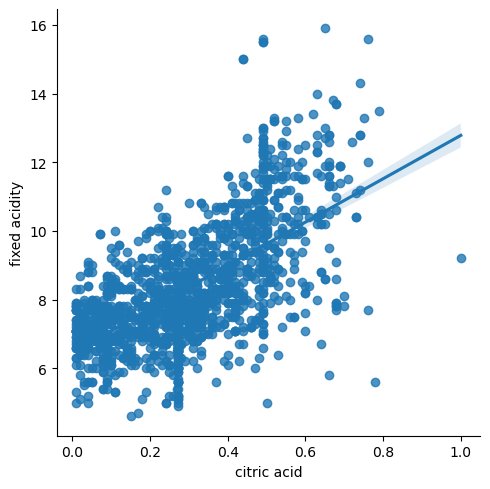

In [31]:
plt.figure(figsize=(20,15))
sns.lmplot(x='citric acid',y='fixed acidity',data=df)
plt.show()

here we can see that citric acid & fixed acidity columns are highly correlated with each other by 64% which is clearly seen in correlation matrix

<Figure size 2000x1500 with 0 Axes>

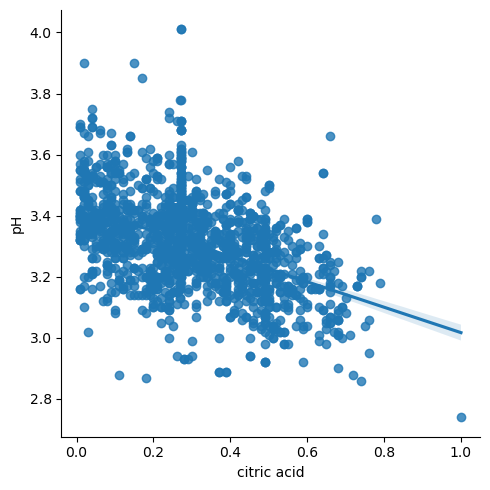

In [32]:
plt.figure(figsize=(20,15))
sns.lmplot(x='citric acid',y='pH',data=df)
plt.show()

here we can see that pH & citric acid columns are highly correlated with each other by 48% which is clearly seen in correlation matrix

<Figure size 2000x1500 with 0 Axes>

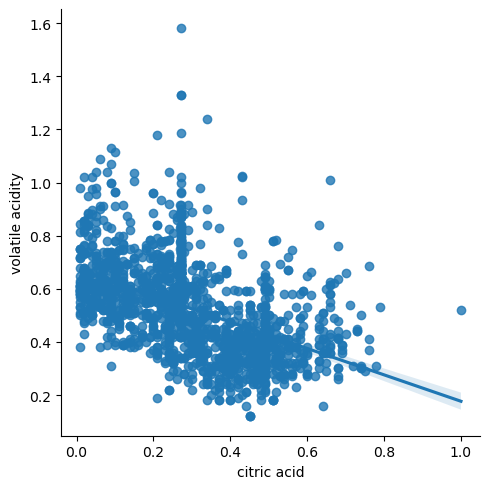

In [33]:
plt.figure(figsize=(20,15))
sns.lmplot(x='citric acid',y='volatile acidity',data=df)
plt.show()

here we can see that volatile acidity & citric acid columns are highly correlated with each other by 49% which is clearly seen in correlation matrix

<Figure size 2000x1500 with 0 Axes>

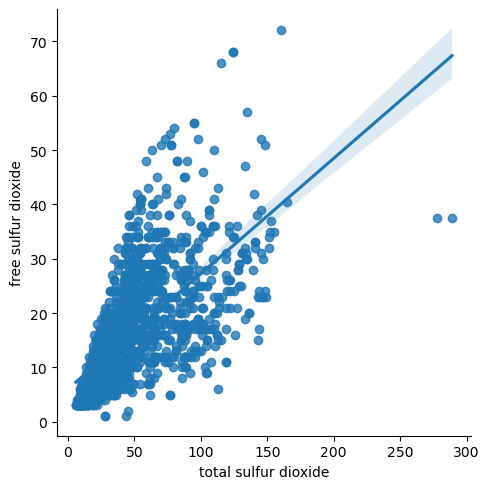

In [34]:
plt.figure(figsize=(20,15))
sns.lmplot(x='total sulfur dioxide',y='free sulfur dioxide',data=df)
plt.show()

here we can see that total sulfur dioxide & free sulfur dioxide columns are highly correlated with each other by 67% which is clearly seen in correlation matrix

<Figure size 2000x1500 with 0 Axes>

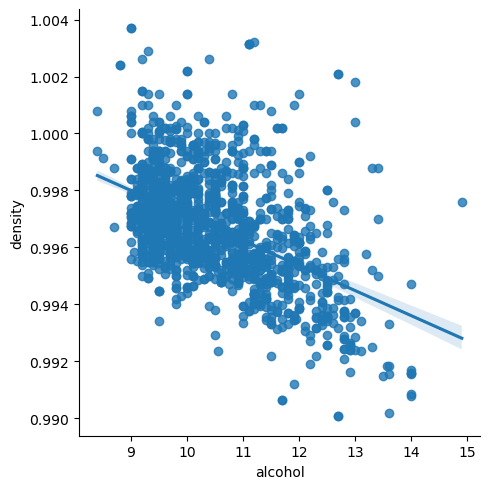

In [35]:
plt.figure(figsize=(20,15))
sns.lmplot(x='alcohol',y='density',data=df)
plt.show()

here we can see that alcohol & density columns are highly correlated with each other by 50% which is clearly seen in correlation matrix

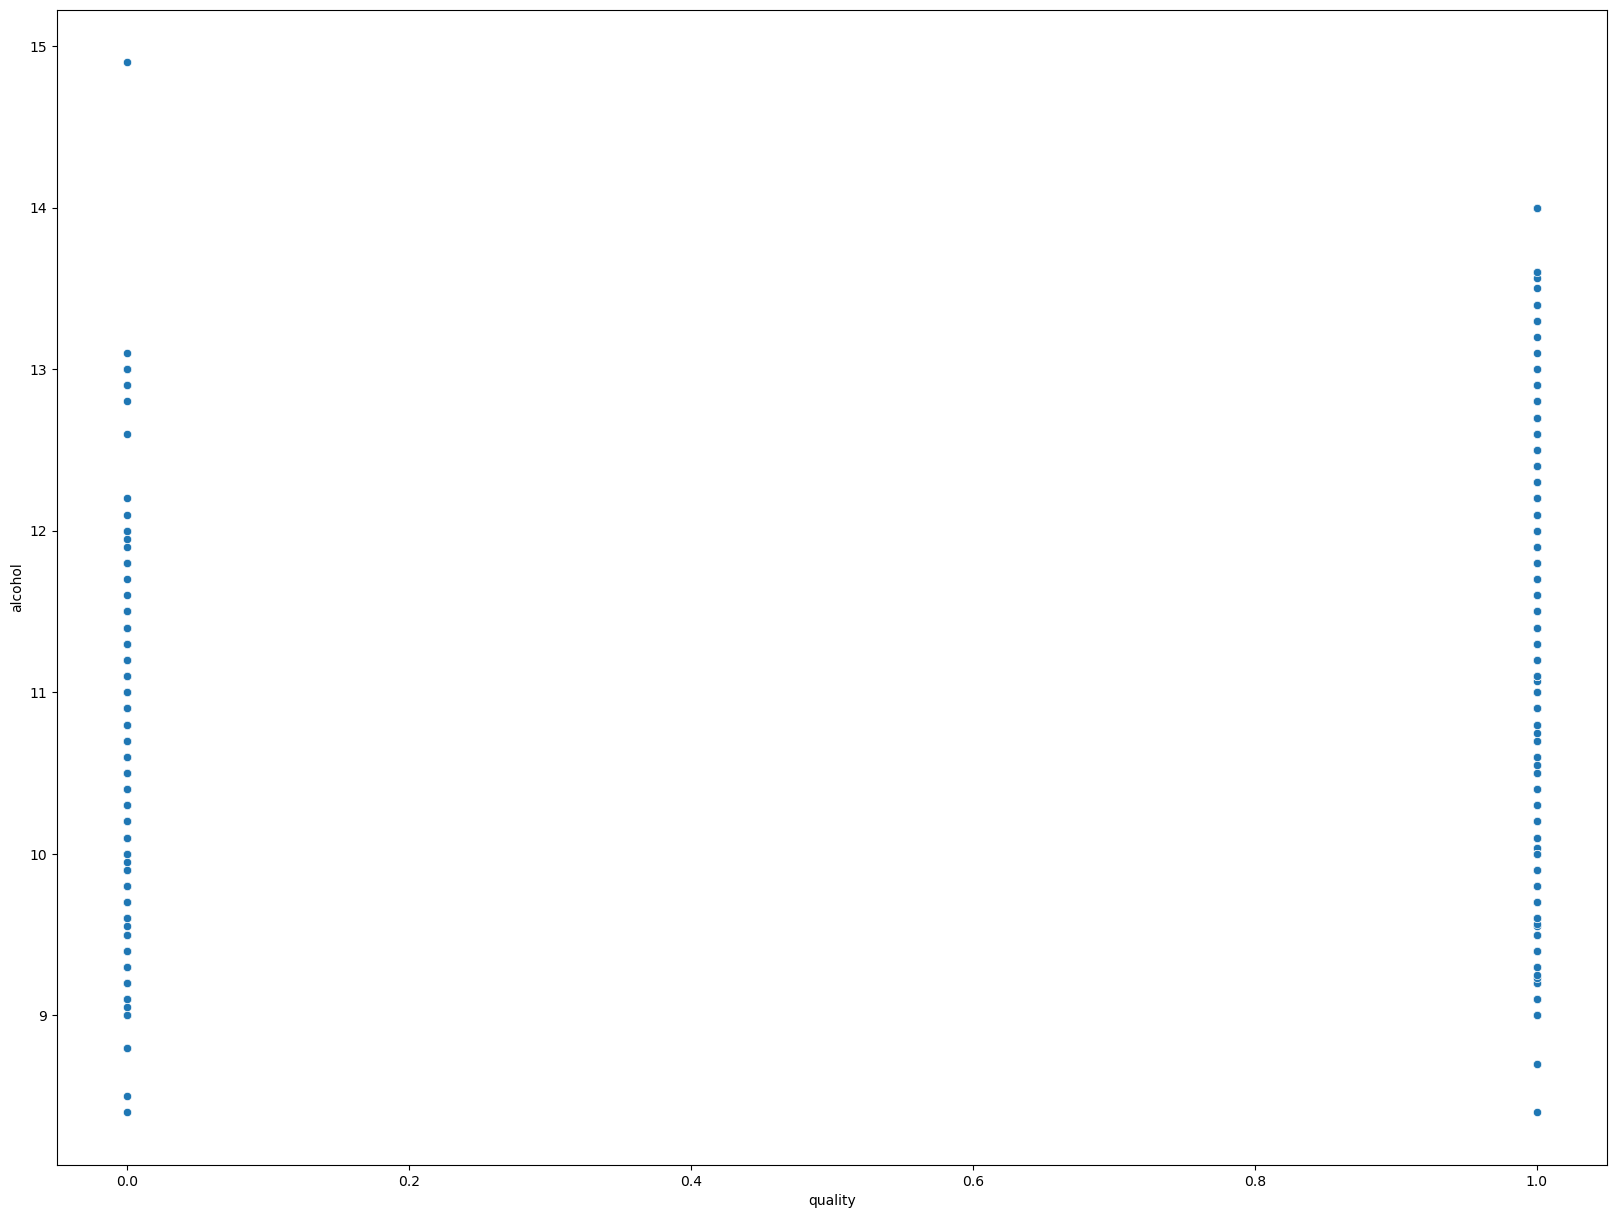

In [36]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='quality',y='alcohol',data=df)
plt.show()

here we can see that in quality 6,7 & 8 the alcohol content is high.so the quality is very much dependent on alcohol.

<Figure size 2000x1500 with 0 Axes>

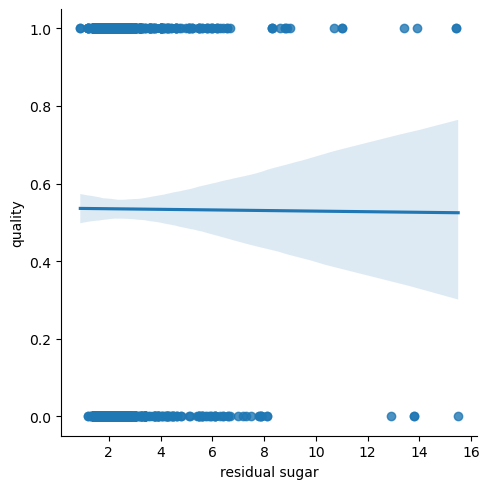

In [37]:
plt.figure(figsize=(20,15))
sns.lmplot(x='residual sugar',y='quality',data=df)
plt.show()

it is clearly visible that residual sugar has very very less correlationship with quality.

<Figure size 2000x1500 with 0 Axes>

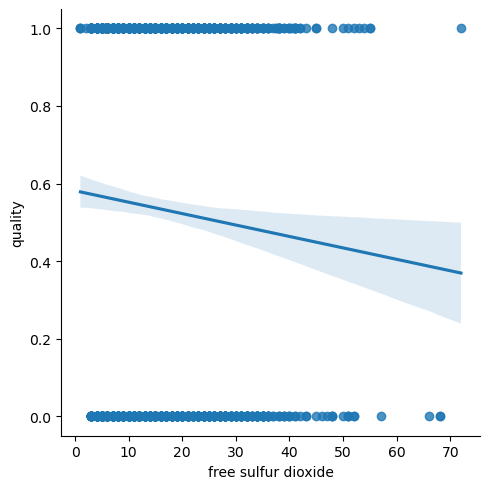

In [38]:
plt.figure(figsize=(20,15))
sns.lmplot(x='free sulfur dioxide',y='quality',data=df)
plt.show()

it is clearly visible that free sulphur dioxide has very less correlationship with quality.

In [39]:
#Multivariate analysis-

<Figure size 2000x1500 with 0 Axes>

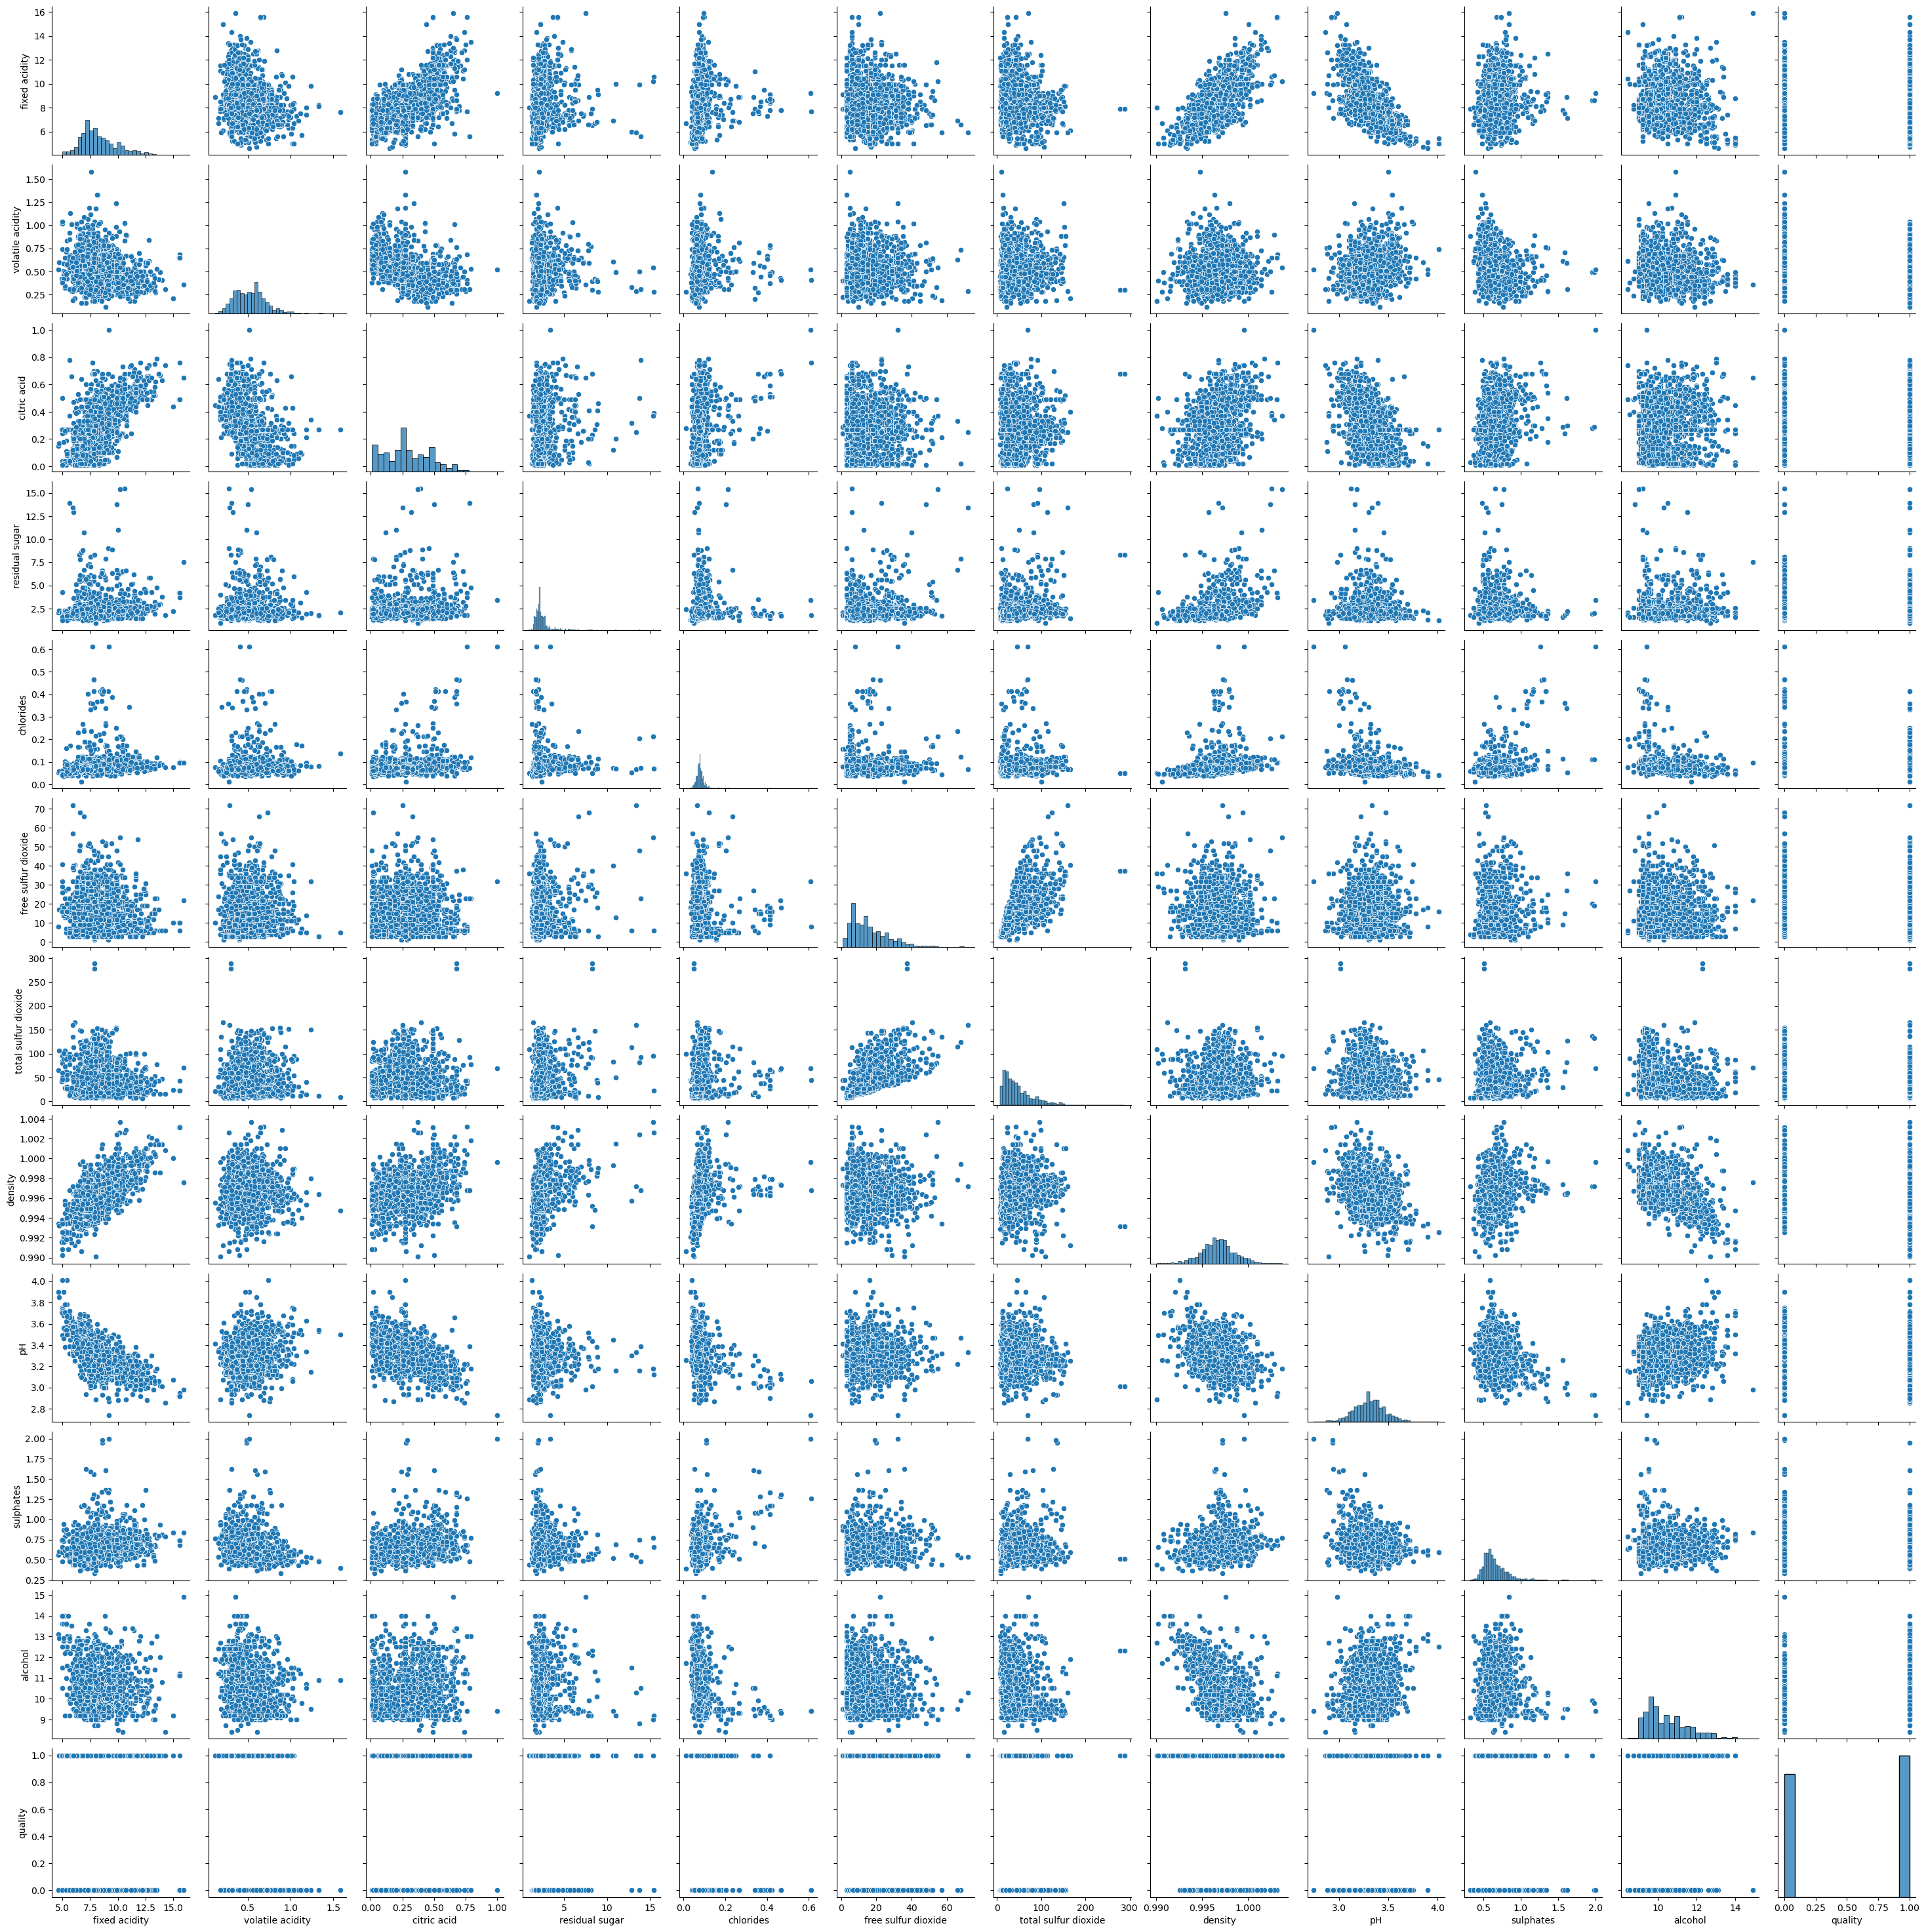

In [40]:
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

Observations-

1. Here we can see that very high correaltionship bw density & fixed acidity, PH & fixed acidity and citric acid and fixed acidity.
2. Here we can see that very high correaltionship bw PH & citric acid and citric acid & volatile acidity.
3. Here we can see that very high correaltionship bw total suphar dioxide and free suphar dioxide.
4. Here we can see that very high correaltionship bw alcohol & density.
5. Here we can see that very high correaltionship bw alcohol & Quality.
6. Here we can observe some multicollinearity issues among the features.

In [41]:
x=df.drop(columns=['quality'],axis=1)
y=df.quality

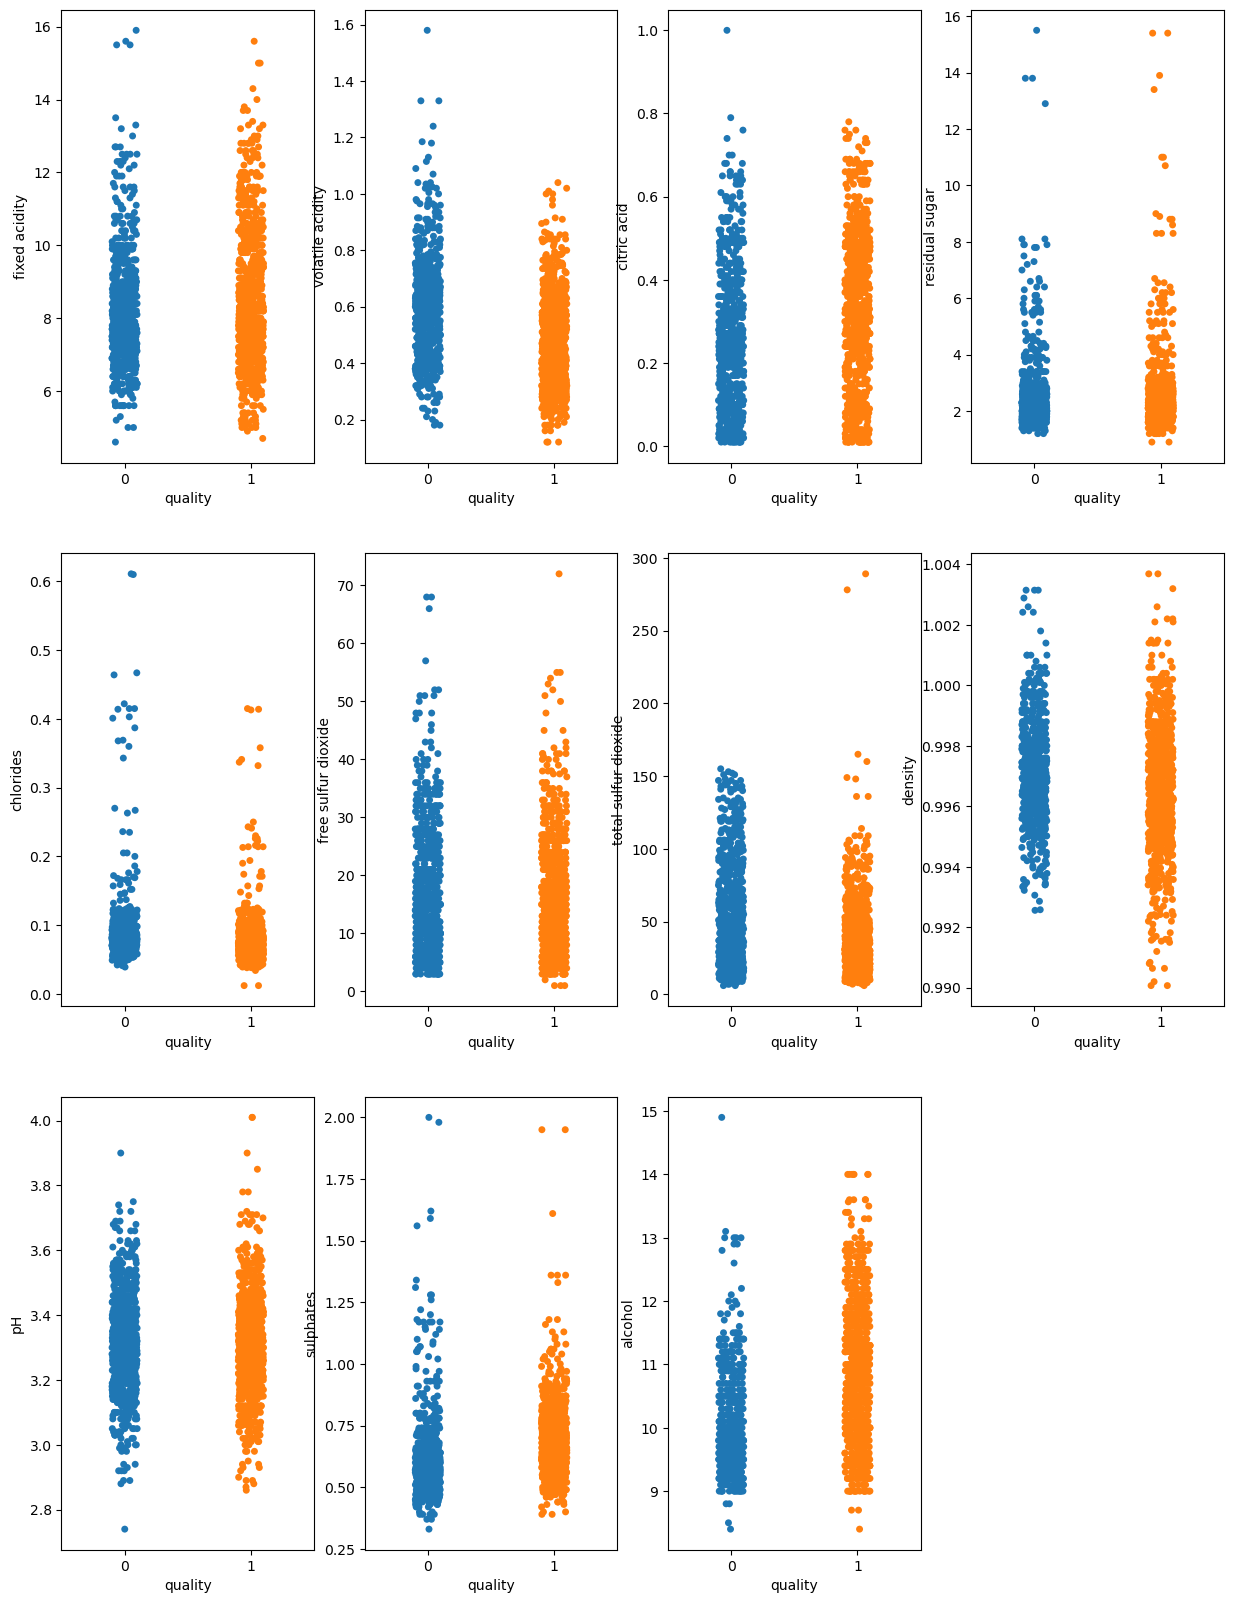

In [42]:
plt.figure(figsize=(15,20))
plotnumber=1

for column in df:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.stripplot(y,x[column])  #sns.stripplot(label,feature)
        
    plotnumber+=1
plt.show() 

In [43]:
# Data distribution-

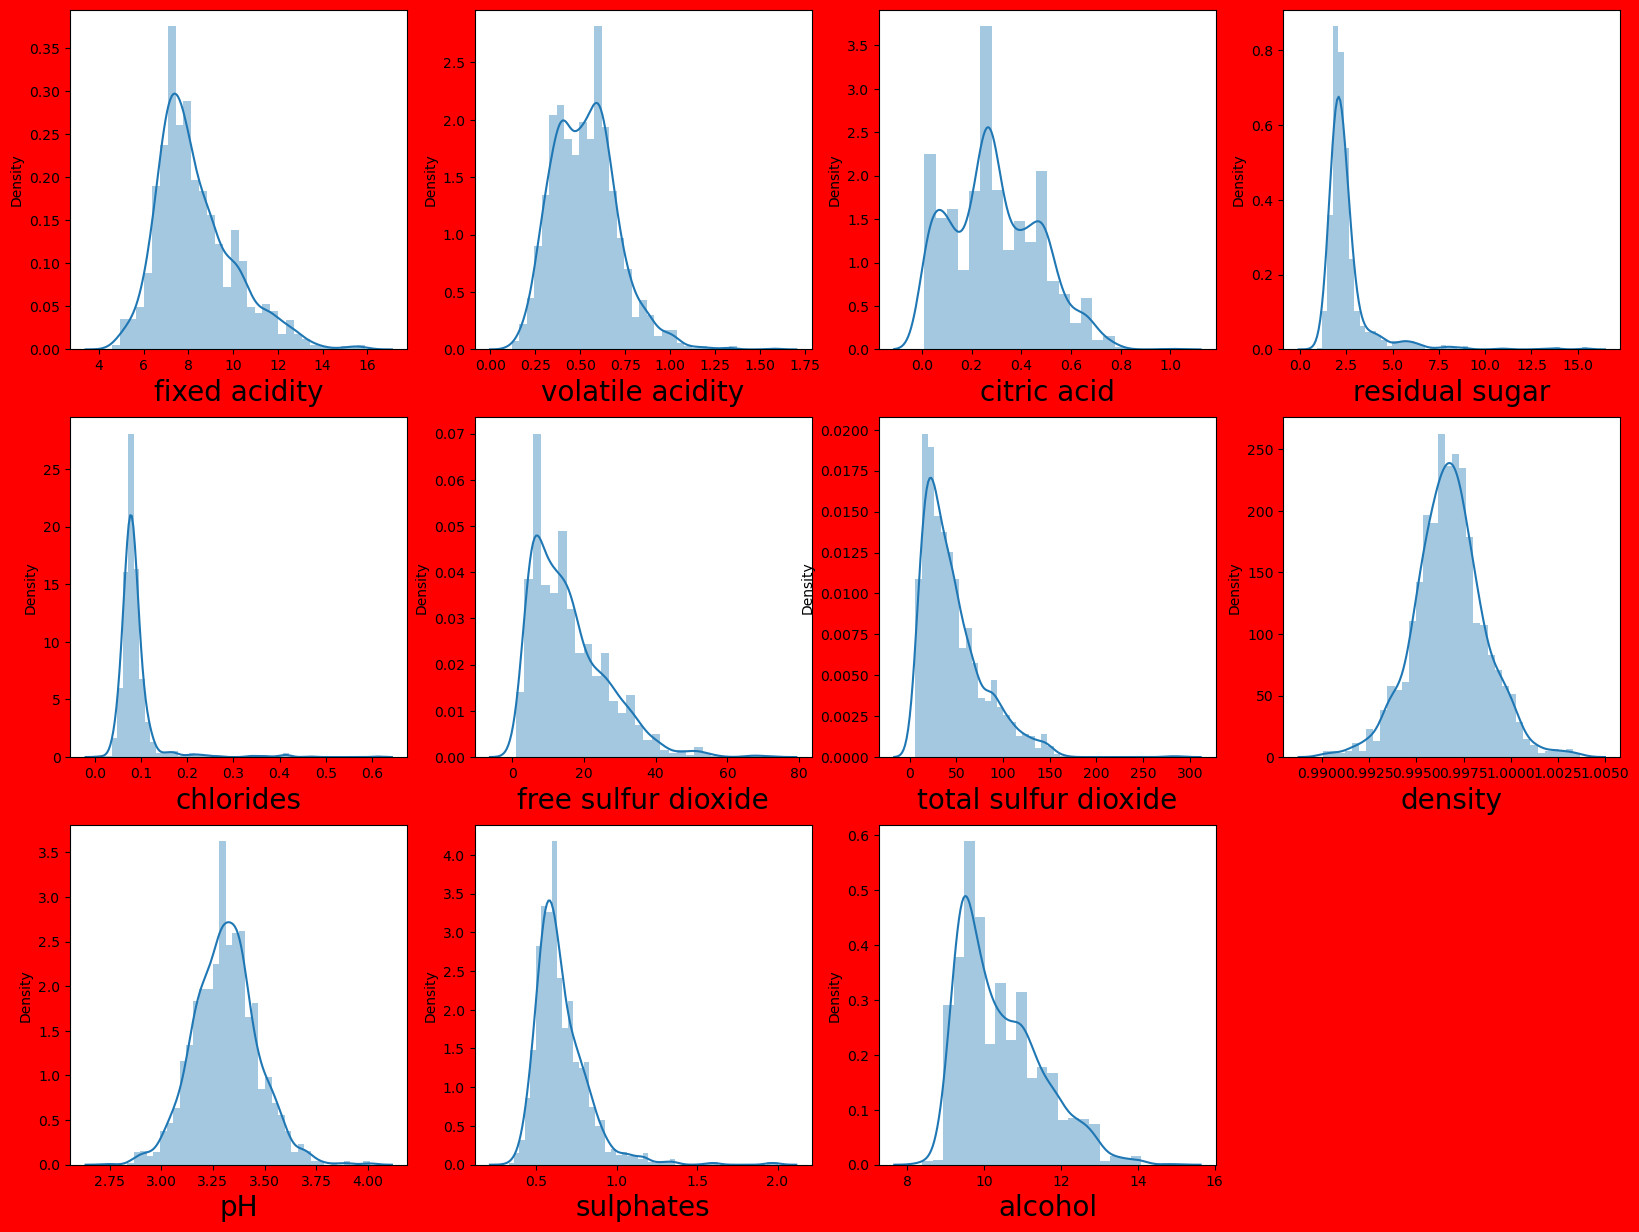

In [44]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in df:      #we are plotting all column in one time.
    if plotnumber<=11:    #9 is total no of column
        x=plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

Observations-

1. fixed acid,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol column 
has right skewed data.
2. citric acid and density column has less skewness.

In [45]:
#Outliers detection-

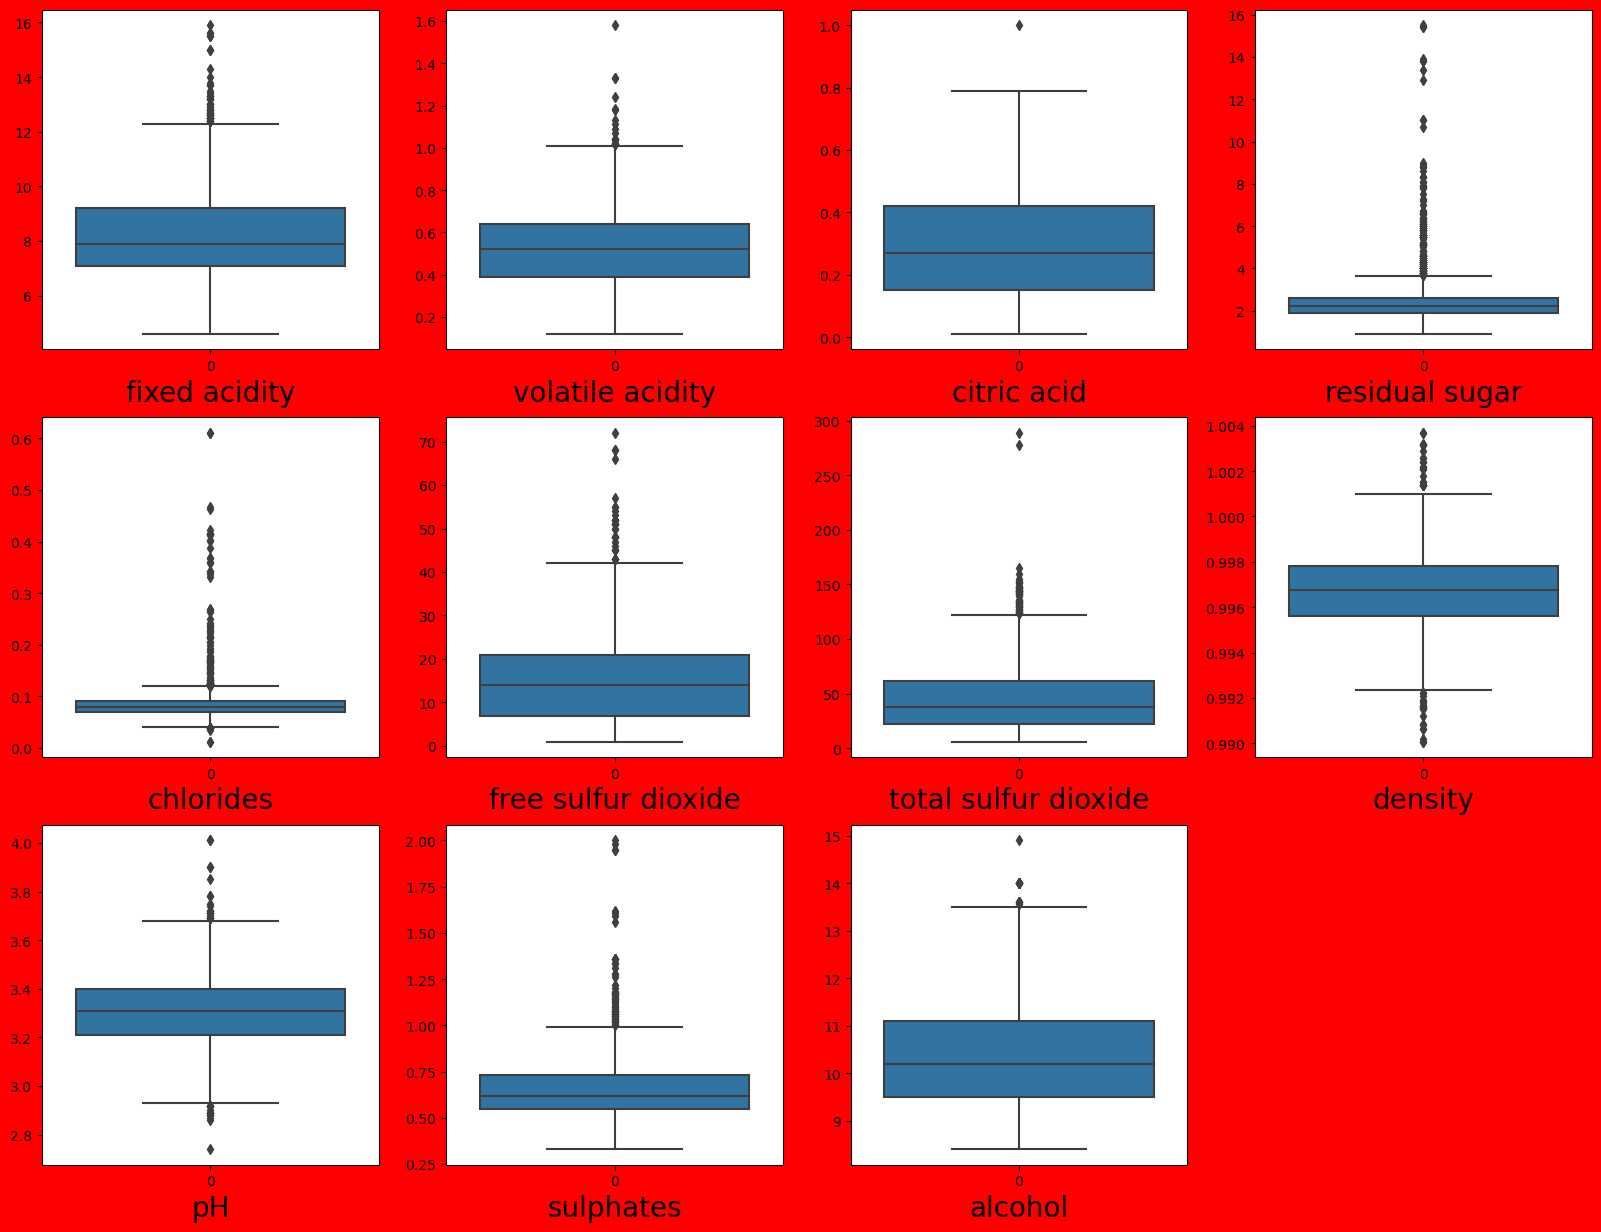

In [46]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in df.columns:      #we are plotting all column in one time.
    if plotnumber<=11:    #9 is total no of column
        x=plt.subplot(3,4,plotnumber)
        sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()   

here we can see that there are outliers in all columns-

Removal of outliers by Zscore method-

In [49]:
x=df.drop(columns=['quality'],axis=1)
y=df.quality

In [50]:
from scipy.stats import zscore
import numpy as np

In [51]:
z=np.abs(zscore(x))
z.shape

(1599, 11)

In [52]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [53]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(1599, 12)
(1458, 12)


In [54]:
data_loss=((df.shape[0]-df1.shape[0])/df.shape[0])*100
data_loss

8.818011257035648

In [55]:
df1

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700     0.270976             1.9      0.076   
1               7.8             0.880     0.270976             2.6      0.098   
2               7.8             0.760     0.040000             2.3      0.092   
3              11.2             0.280     0.560000             1.9      0.075   
4               7.4             0.700     0.270976             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600     0.080000             2.0      0.090   
1595            5.9             0.550     0.100000             2.2      0.062   
1596            6.3             0.510     0.130000             2.3      0.076   
1597            5.9             0.645     0.120000             2.0      0.075   
1598            6.0             0.310     0.470000             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1458 rows x 12 columns]

In [56]:
df1.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.291232
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                -0.159793
dtype: float64

Here we can see that except citric acid,density,pH column,all columns has skewness which needs to be removed before building 
model.

In [57]:
#Removing skewness using cube root method-

In [58]:
df1['fixed acidity']=np.cbrt(df1['fixed acidity'])

In [59]:
df1['volatile acidity']=np.cbrt(df1['volatile acidity'])

In [60]:
df1['residual sugar']=np.cbrt(df1['residual sugar'])

In [61]:
df1['chlorides']=np.cbrt(df1['chlorides'])

In [62]:
df1['free sulfur dioxide']=np.cbrt(df1['free sulfur dioxide'])

In [63]:
df1['total sulfur dioxide']=np.cbrt(df1['total sulfur dioxide'])

In [64]:
df1['sulphates']=np.cbrt(df1['sulphates'])

In [65]:
df1['alcohol']=np.cbrt(df1['alcohol'])

In [66]:
df1.skew()

fixed acidity           0.527560
volatile acidity       -0.185057
citric acid             0.291232
residual sugar          1.629756
chlorides               1.056128
free sulfur dioxide     0.127793
total sulfur dioxide    0.343010
density                 0.055543
pH                      0.113039
sulphates               0.526494
alcohol                 0.643830
quality                -0.159793
dtype: float64

Here we can see there is still skewness in few columns like fixed acidity,residual sugar,chhlorides,sulphates,alcohol

In [67]:
df1.corr().quality

fixed acidity           0.109366
volatile acidity       -0.305159
citric acid             0.166678
residual sugar          0.017336
chlorides              -0.109968
free sulfur dioxide    -0.060219
total sulfur dioxide   -0.227675
density                -0.149353
pH                     -0.032907
sulphates               0.347858
alcohol                 0.443509
quality                 1.000000
Name: quality, dtype: float64

Observations-

1. here we can see that residual sugar which have much skewed data is only 1% correlated with my target variable so i can drop this column if required.
2. chloride column also has skewed data which is 10% -ve correlated with my target variable.
3. sulphates which also has skewed data which is 34% correlated with target variable,

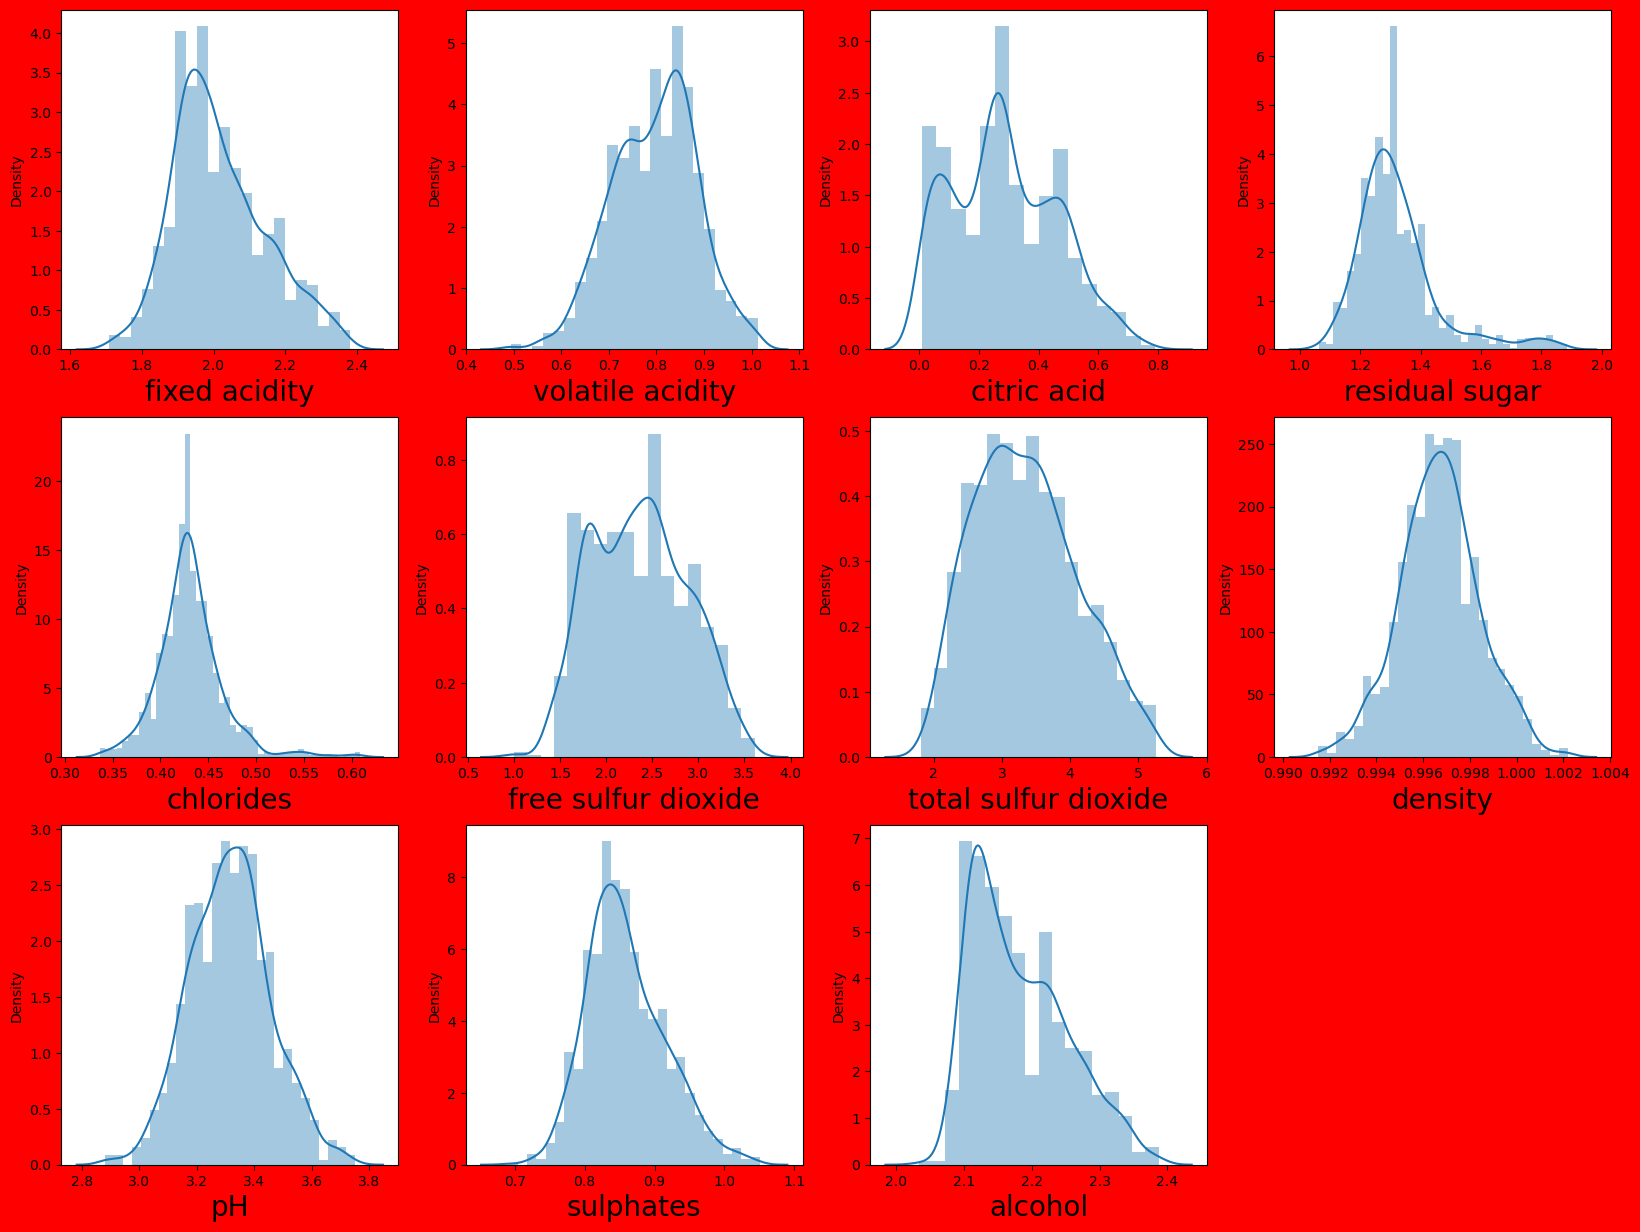

In [68]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in df1:      #we are plotting all column in one time.
    if plotnumber<=11:    #9 is total no of column
        x=plt.subplot(3,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

Here we can see that skewness has been resolved but not fully in the data set.

In [69]:
df1.corr().quality

fixed acidity           0.109366
volatile acidity       -0.305159
citric acid             0.166678
residual sugar          0.017336
chlorides              -0.109968
free sulfur dioxide    -0.060219
total sulfur dioxide   -0.227675
density                -0.149353
pH                     -0.032907
sulphates               0.347858
alcohol                 0.443509
quality                 1.000000
Name: quality, dtype: float64

In [70]:
x=df1.drop(columns=['quality'],axis=1)
y=df1.quality

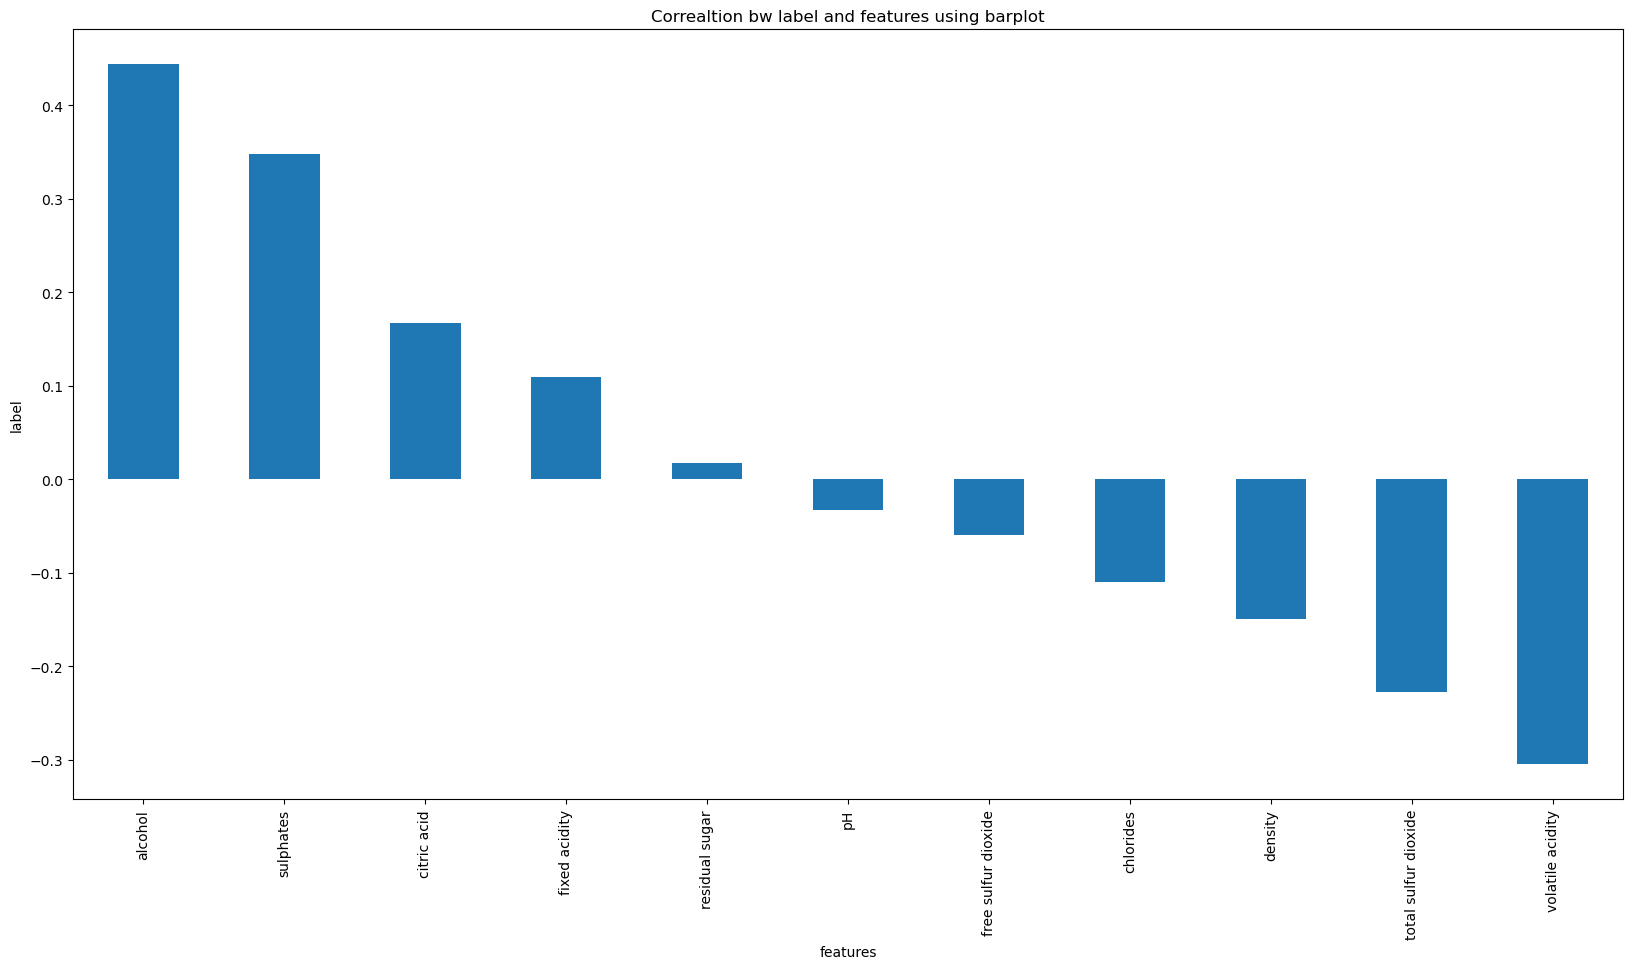

In [71]:
plt.figure(figsize=(20,10))
df1.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('label')
plt.title('Correaltion bw label and features using barplot')
plt.show()

here what i am doing is dropping those columns which has most outliers and has less relationship with target variable.
 like fixed acidity,pH,residual sugar.

In [72]:
df2=df1.drop(columns=['fixed acidity','pH','residual sugar'],axis=1)
df2

volatile acidity  citric acid  chlorides  free sulfur dioxide  \
0             0.887904     0.270976   0.423582             2.223980   
1             0.958284     0.270976   0.461044             2.924018   
2             0.912581     0.040000   0.451436             2.466212   
3             0.654213     0.560000   0.421716             2.571282   
4             0.887904     0.270976   0.423582             2.223980   
...                ...          ...        ...                  ...   
1594          0.843433     0.080000   0.448140             3.174802   
1595          0.819321     0.100000   0.395789             3.391211   
1596          0.798957     0.130000   0.423582             3.072317   
1597          0.864012     0.120000   0.421716             3.174802   
1598          0.676790     0.470000   0.406155             2.620741   

      total sulfur dioxide  density  sulphates   alcohol  quality  
0                 3.239612  0.99780   0.824257  2.110454        0  
1                 4.061548  0.99680   0.879366  2.139975        0  
2                 3.779763  0.99700   0.866239  2.139975        0  
3                 3.914868  0.99800   0.833955  2.139975        1  
4                 3.239612  0.99780   0.824257  2.110454        0  
...                    ...      ...        ...       ...      ...  
1594              3.530348  0.99490   0.833955  2.189760        0  
1595              3.708430  0.99512   0.912581  2.237378        1  
1596              3.419952  0.99574   0.908560  2.223980        1  
1597              3.530348  0.99547   0.892112  2.168703        0  
1598              3.476027  0.99549   0.870659  2.223980        1  

[1458 rows x 9 columns]

here i have dropped the columns which are having less correlationship with the target variable and at the same time they have high skewness and outliers
so i have dropped fixed acidity,pH, residual sugar column

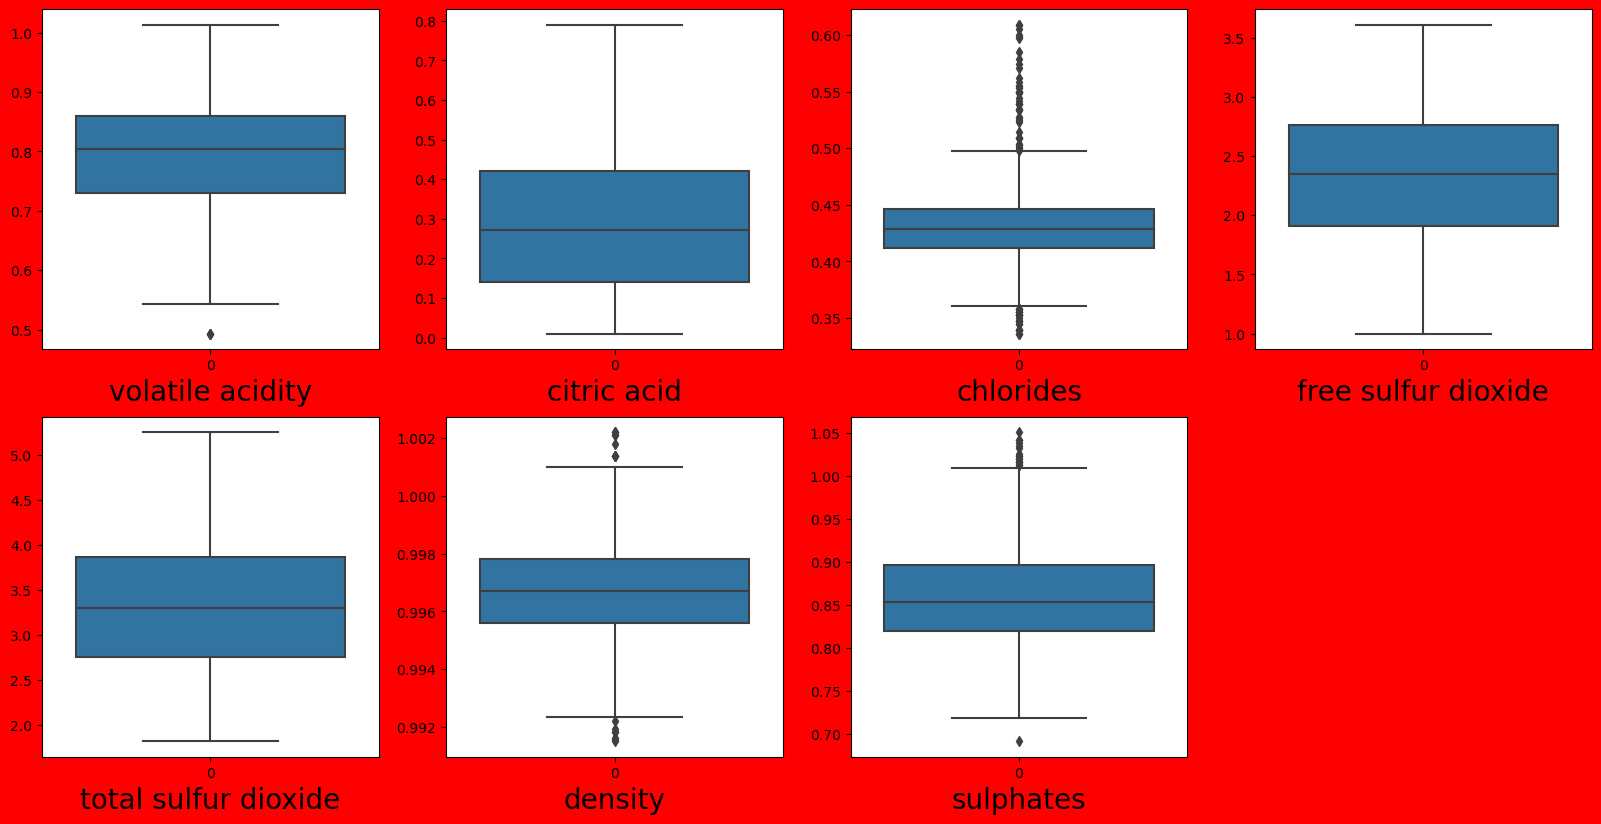

In [73]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in df2.columns:      #we are plotting all column in one time.
    if plotnumber<=7:    #9 is total no of column
        x=plt.subplot(3,4,plotnumber)
        sns.boxplot(data=df2[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

In [74]:
df2.skew()

volatile acidity       -0.185057
citric acid             0.291232
chlorides               1.056128
free sulfur dioxide     0.127793
total sulfur dioxide    0.343010
density                 0.055543
sulphates               0.526494
alcohol                 0.643830
quality                -0.159793
dtype: float64

now the skewness looks under the range not fully but we may proceed for model building with these features.

In [75]:
#Separating x and y from final data data frame after feature selection.

In [76]:
x=df2.drop('quality',axis=1)  
y=df2['quality']

In [77]:
# Feature scaling- 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

volatile acidity  citric acid  chlorides  free sulfur dioxide  \
0             1.028742    -0.091993  -0.212751            -0.276875   
1             1.820900    -0.091993   0.883719             1.096574   
2             1.306487    -1.415813   0.602501             0.198376   
3            -1.601551     1.564530  -0.267369             0.404518   
4             1.028742    -0.091993  -0.212751            -0.276875   
...                ...          ...        ...                  ...   
1453          0.528198    -1.186556   0.506051             1.588604   
1454          0.256813    -1.071927  -1.026243             2.013192   
1455          0.027604    -0.899984  -0.212751             1.387532   
1456          0.759830    -0.957298  -0.267369             1.588604   
1457         -1.347440     1.048701  -0.722846             0.501557   

      total sulfur dioxide   density  sulphates   alcohol  
0                -0.151874  0.629873  -0.621424 -1.019282  
1                 0.934243  0.047678   0.359794 -0.597376  
2                 0.561889  0.164117   0.126070 -0.597376  
3                 0.740417  0.746312  -0.448750 -0.597376  
4                -0.151874  0.629873  -0.621424 -1.019282  
...                    ...       ...        ...       ...  
1453              0.232309 -1.058494  -0.448750  0.114140  
1454              0.467628 -0.930411   0.951183  0.794696  
1455              0.086430 -0.569449   0.879603  0.603216  
1456              0.232309 -0.726642   0.586742 -0.186800  
1457              0.160528 -0.714998   0.204763  0.603216  

[1458 rows x 8 columns]

In [78]:
#checking for multicollinearity-

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

VIF Values              Features
0    1.690596      volatile acidity
1    2.041993           citric acid
2    1.187909             chlorides
3    2.485089   free sulfur dioxide
4    2.609570  total sulfur dioxide
5    2.050177               density
6    1.302877             sulphates
7    1.792013               alcohol

it is clearly visible there is no multicollinearity among the features so we ca move ahead for model building.

In [80]:
# Model building-

In [81]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.8493150684931506 at random state 11


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25, random_state=maxrs)

In [84]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('/n=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('/n=====================Test Result=====================') 
        print(f'accuracy_score: {accuracy_score(y_test,pred)*100:.2f}%')
        print(f'confusion matrix is: \n{confusion_matrix(y_test,pred)}')
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

defined a function

In [85]:
#logistic regression-

In [86]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [87]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 71.91%
/n=====================Test Result=====================
accuracy_score: 78.63%
confusion matrix is: 
[[117  52]
 [ 26 170]]


 Test classification report
               precision    recall  f1-score   support

           0       0.82      0.69      0.75       169
           1       0.77      0.87      0.81       196

    accuracy                           0.79       365
   macro avg       0.79      0.78      0.78       365
weighted avg       0.79      0.79      0.78       365



the test accuracy for logistic regression is 79%

In [88]:
# Random forest-

In [89]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 86.58%
confusion matrix is: 
[[143  26]
 [ 23 173]]


 Test classification report
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       169
           1       0.87      0.88      0.88       196

    accuracy                           0.87       365
   macro avg       0.87      0.86      0.86       365
weighted avg       0.87      0.87      0.87       365



for random forest model i am getting 86.5% test accuracy but train accuracy is 100 % so there is overfitting problem in the model

In [91]:
#SupportVectorMachineClassifier-

In [92]:
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [93]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 77.40%
/n=====================Test Result=====================
accuracy_score: 81.37%
confusion matrix is: 
[[130  39]
 [ 29 167]]


 Test classification report
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       169
           1       0.81      0.85      0.83       196

    accuracy                           0.81       365
   macro avg       0.81      0.81      0.81       365
weighted avg       0.81      0.81      0.81       365



for support vector classifier method i am getting 81% my test accuracy and almost 77% the train accuracy which is good.

In [94]:
#GradientBoostingClassifier-

In [95]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [96]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 86.92%
/n=====================Test Result=====================
accuracy_score: 84.93%
confusion matrix is: 
[[136  33]
 [ 22 174]]


 Test classification report
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       169
           1       0.84      0.89      0.86       196

    accuracy                           0.85       365
   macro avg       0.85      0.85      0.85       365
weighted avg       0.85      0.85      0.85       365



for gradient boosting classifier method i am getting 86% my train accuracy and almost 85% the test accuracy which is good

In [97]:
#AdaBoostClassifier-

In [98]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [99]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 77.40%
/n=====================Test Result=====================
accuracy_score: 78.36%
confusion matrix is: 
[[125  44]
 [ 35 161]]


 Test classification report
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       169
           1       0.79      0.82      0.80       196

    accuracy                           0.78       365
   macro avg       0.78      0.78      0.78       365
weighted avg       0.78      0.78      0.78       365



for ada boost classifier method i am getting 77% my train accuracy and almost 78% the test accuracy which is good

In [100]:
#BaggingClassifier-

In [103]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [104]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 98.26%
/n=====================Test Result=====================
accuracy_score: 84.38%
confusion matrix is: 
[[138  31]
 [ 26 170]]


 Test classification report
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       169
           1       0.85      0.87      0.86       196

    accuracy                           0.84       365
   macro avg       0.84      0.84      0.84       365
weighted avg       0.84      0.84      0.84       365



for bagging classifier method i am getting 98% my train accuracy and almost 84% the test accuracy which is good

In [105]:
#ExtraTreeClassifier-

In [106]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [107]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 86.03%
confusion matrix is: 
[[138  31]
 [ 20 176]]


 Test classification report
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       169
           1       0.85      0.90      0.87       196

    accuracy                           0.86       365
   macro avg       0.86      0.86      0.86       365
weighted avg       0.86      0.86      0.86       365



for extra tree classifier method i am getting 100% my train accuracy and almost 86% the test accuracy which is good

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [110]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 76.44%
confusion matrix is: 
[[120  49]
 [ 37 159]]


 Test classification report
               precision    recall  f1-score   support

           0       0.76      0.71      0.74       169
           1       0.76      0.81      0.79       196

    accuracy                           0.76       365
   macro avg       0.76      0.76      0.76       365
weighted avg       0.76      0.76      0.76       365



for decision tree classifier i am getting 100% train accuracy but 76.4% only test accuracy so there is the problem of overfitting
in the model

In [111]:
#Cross validation-

In [112]:
from sklearn.model_selection import cross_val_score

In [113]:
#logistic regression-

In [114]:
def score(clf,x,y):
    score1=cross_val_score(clf,x,y)
    print(score1)
    print('cross validation score is:-',score1.mean())

In [119]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [120]:
score(clf,x,y)

[0.67123288 0.69863014 0.78424658 0.73539519 0.74226804]
cross validation score is:- 0.7263545638563291


The cross validation score for logistic regression is 72.6%

In [121]:
# Random forest-

In [124]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [125]:
score(clf,x,y)

[0.65068493 0.73287671 0.77054795 0.70446735 0.72852234]
cross validation score is:- 0.7174198559525491


The cross validation score for logistic regression is 71.7%

In [126]:
#SupportVectorMachineClassifier-

In [127]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [128]:
score(svc,x,y)

[0.70205479 0.70890411 0.78424658 0.70446735 0.73195876]
cross validation score is:- 0.7263263192581085


The cross validation score for SVC is 72.6%

In [129]:
#GradientBoostingClassifier-

In [130]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [131]:
score(clf,x,y)

[0.67123288 0.73287671 0.75       0.70103093 0.75601375]
cross validation score is:- 0.722230852516123


The cross validation score for gradient boosting classifier is 72%

In [132]:
#AdaBoostClassifier-

In [133]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [134]:
score(clf,x,y)

[0.69178082 0.70890411 0.76027397 0.70790378 0.72164948]
cross validation score is:- 0.7181024337428801


The cross validation score for ada boosting classifier is 72%

In [135]:
#BaggingClassifier-

In [142]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [143]:
score(clf,x,y)

[0.64041096 0.74657534 0.75       0.71134021 0.71821306]
cross validation score is:- 0.7133079131949349


The cross validation score for bagging classifier is 71.3%

In [144]:
#ExtraTreeClassifier-

In [145]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [146]:
score(clf,x,y)

[0.67808219 0.72945205 0.78767123 0.71477663 0.72164948]
cross validation score is:- 0.7263263192581085


The cross validation score for extra tree classifier is 72.6%

In [147]:
#DecisionTreeClassifier

In [154]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [155]:
score(clf,x,y)

[0.61986301 0.67808219 0.67808219 0.73539519 0.63230241]
cross validation score is:- 0.6687449983523984


The cross validation score for decision tree classifier is 66.8% only.

here i am selecting Gradientboostingclassifier as my best model to perform hyper parameter tunning to increase its accuracy by 
changing the parameters.

In [156]:
#Hyperparameter tunning-

In [157]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [158]:
gb=GradientBoostingClassifier()

In [159]:
gb.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [160]:
param_grid={'criterion':['friedman_mse', 'squared_error'],'loss' : ['deviance', 'exponential'],'n_estimators':[50,100],'learning_rate' :[0.01,0.1],'min_samples_split' :[3,4,5,6],'random_state':[100,1000,200],'min_samples_split':[2,3,4,5],'max_depth':[4,5,6],'max_features' : ['auto', 'sqrt']}

In [161]:
grid_search=GridSearchCV(estimator=gb,param_grid=param_grid,cv=5)

In [162]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100],
                         'random_state': [100, 1000, 200]})

In [163]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 100}

In [164]:
clf=GradientBoostingClassifier(criterion= 'friedman_mse',
 learning_rate= 0.1,
 loss= 'exponential',
 max_depth= 33,
 max_features= 'sqrt',
 min_samples_split= 6,
 n_estimators= 500,
 random_state= 300)

In [165]:
clf.fit(x_train,y_train)

GradientBoostingClassifier(loss='exponential', max_depth=33,
                           max_features='sqrt', min_samples_split=6,
                           n_estimators=500, random_state=300)

In [156]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 84.72%
confusion matrix is: 
[[146  38]
 [ 19 170]]


 Test classification report
               precision    recall  f1-score   support

           0       0.88      0.79      0.84       184
           1       0.82      0.90      0.86       189

    accuracy                           0.85       373
   macro avg       0.85      0.85      0.85       373
weighted avg       0.85      0.85      0.85       373



here after applying hyper parameter tunning here i am getting again 84.7% of test accuracy.

In [166]:
prediction=clf.predict(x_test)
prediction

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,

In [167]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0            0         0
1            1         0
2            0         0
3            0         1
4            1         1
..         ...       ...
360          0         0
361          1         1
362          0         0
363          1         1
364          1         1

[365 rows x 2 columns]

Here we can see that our model has 85% accuracy.

In [168]:
#AUC ROC curve-

In [169]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

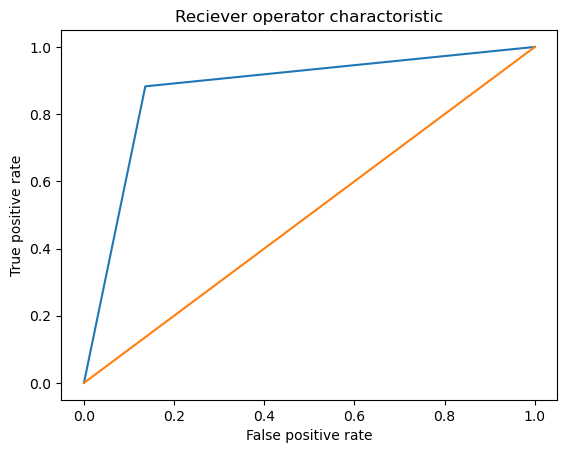

0.8732791933341384


In [170]:
fpr,tpr,threshold=roc_curve(y_test,clf.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,clf.predict(x_test))
print(auc_score)

Here we can see that my final model after hyperparameter tunning, the auc score for the model is aprox 87.3% which is quiet good.

In [171]:
#Model No-2 Building with using feature selection method-

In [181]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1599 rows x 12 columns]

Here i got my old data frame with all features and label.

In [182]:
#Feature selection-

In [183]:
from sklearn.feature_selection import SelectKBest,f_classif  

In [185]:
best_features=SelectKBest(score_func=f_classif,k=7) 
                                                     

fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)   
df_columns=pd.DataFrame(x.columns)  



feature_score= pd.concat([df_scores,df_columns],axis=1)
feature_score.columns=['score','feature_name']  

print(feature_score.nlargest(7,'score')) 

        score          feature_name
7  356.523812               alcohol
6  200.437668             sulphates
0  149.507913      volatile acidity
4   79.599019  total sulfur dioxide
1   41.605620           citric acid
5   33.218872               density
2   17.823002             chlorides


In [186]:
df1=df[['alcohol','sulphates','volatile acidity','total sulfur dioxide','citric acid','density','chlorides','quality']]
df1

alcohol  sulphates  volatile acidity  total sulfur dioxide  citric acid  \
0         9.4       0.56             0.700                  34.0         0.00   
1         9.8       0.68             0.880                  67.0         0.00   
2         9.8       0.65             0.760                  54.0         0.04   
3         9.8       0.58             0.280                  60.0         0.56   
4         9.4       0.56             0.700                  34.0         0.00   
...       ...        ...               ...                   ...          ...   
1594     10.5       0.58             0.600                  44.0         0.08   
1595     11.2       0.76             0.550                  51.0         0.10   
1596     11.0       0.75             0.510                  40.0         0.13   
1597     10.2       0.71             0.645                  44.0         0.12   
1598     11.0       0.66             0.310                  42.0         0.47   

      density  chlorides  quality  
0     0.99780      0.076        0  
1     0.99680      0.098        0  
2     0.99700      0.092        0  
3     0.99800      0.075        1  
4     0.99780      0.076        0  
...       ...        ...      ...  
1594  0.99490      0.090        0  
1595  0.99512      0.062        1  
1596  0.99574      0.076        1  
1597  0.99547      0.075        0  
1598  0.99549      0.067        1  

[1599 rows x 8 columns]

Here we got the new data frame with all the best selected features and label.

In [187]:
df1.skew()

alcohol                 0.860829
sulphates               2.428672
volatile acidity        0.671593
total sulfur dioxide    1.515531
citric acid             0.318337
density                 0.071288
chlorides               5.680347
quality                -0.139303
dtype: float64

In [188]:
#Checking for ouliers-

In [193]:
x=df1.drop(columns=['quality'],axis=1)
y=df1.quality

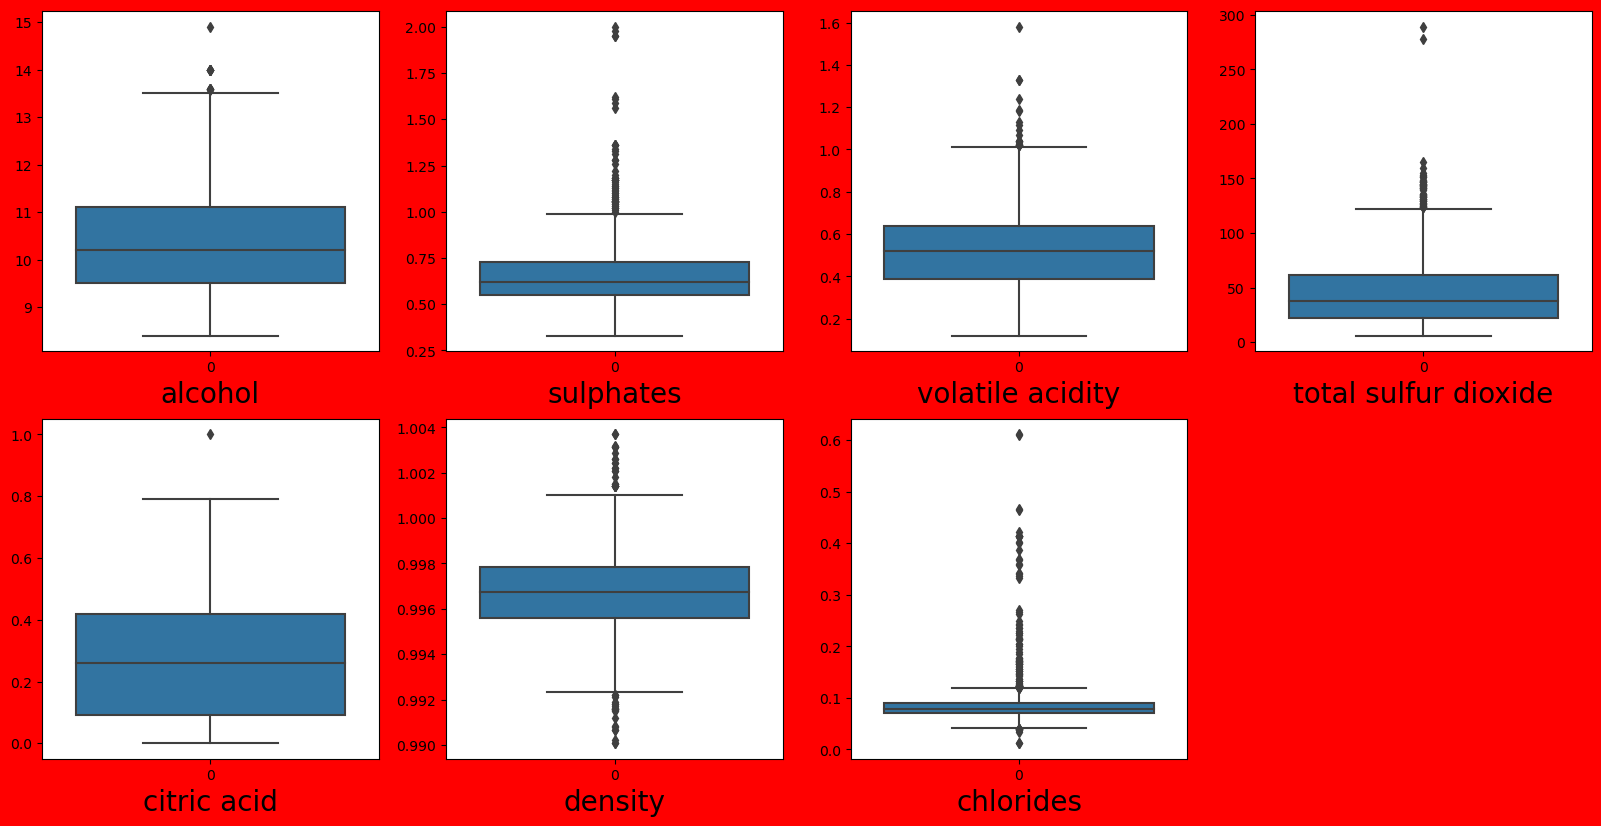

In [190]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1


for column in x:      #we are plotting all column in one time.
    if plotnumber<=7:    #9 is total no of column
        x=plt.subplot(3,4,plotnumber)
        sns.boxplot(data=df1[column])
        plt.xlabel(column,fontsize=20) #to give x label
    plotnumber+=1
plt.show()

In [191]:
from scipy.stats import zscore
import numpy as np

In [194]:
z=np.abs(zscore(x))
z.shape

(1599, 7)

In [195]:
df2=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df2.shape)

(1599, 8)
(1505, 8)


In [196]:
df2

alcohol  sulphates  volatile acidity  total sulfur dioxide  citric acid  \
0         9.4       0.56             0.700                  34.0         0.00   
1         9.8       0.68             0.880                  67.0         0.00   
2         9.8       0.65             0.760                  54.0         0.04   
3         9.8       0.58             0.280                  60.0         0.56   
4         9.4       0.56             0.700                  34.0         0.00   
...       ...        ...               ...                   ...          ...   
1594     10.5       0.58             0.600                  44.0         0.08   
1595     11.2       0.76             0.550                  51.0         0.10   
1596     11.0       0.75             0.510                  40.0         0.13   
1597     10.2       0.71             0.645                  44.0         0.12   
1598     11.0       0.66             0.310                  42.0         0.47   

      density  chlorides  quality  
0     0.99780      0.076        0  
1     0.99680      0.098        0  
2     0.99700      0.092        0  
3     0.99800      0.075        1  
4     0.99780      0.076        0  
...       ...        ...      ...  
1594  0.99490      0.090        0  
1595  0.99512      0.062        1  
1596  0.99574      0.076        1  
1597  0.99547      0.075        0  
1598  0.99549      0.067        1  

[1505 rows x 8 columns]

In [197]:
#Lets remove skewness from the data-

In [205]:
df2['sulphates']=np.log(df2['sulphates'])

In [206]:
df2['total sulfur dioxide']=np.log(df2['total sulfur dioxide'])

In [207]:
df2['chlorides']=np.log(df2['chlorides'])

In [208]:
df2['volatile acidity']=np.log(df2['volatile acidity'])

In [209]:
df2.skew()

alcohol                 0.752482
sulphates               0.336271
volatile acidity       -0.524437
total sulfur dioxide   -0.112088
citric acid             0.312263
density                 0.068771
chlorides               0.475862
quality                -0.166855
dtype: float64

Now the skewness is bit in control.

In [210]:
df2

alcohol  sulphates  volatile acidity  total sulfur dioxide  citric acid  \
0         9.4  -0.579818         -0.356675              3.526361         0.00   
1         9.8  -0.385662         -0.127833              4.204693         0.00   
2         9.8  -0.430783         -0.274437              3.988984         0.04   
3         9.8  -0.544727         -1.272966              4.094345         0.56   
4         9.4  -0.579818         -0.356675              3.526361         0.00   
...       ...        ...               ...                   ...          ...   
1594     10.5  -0.544727         -0.510826              3.784190         0.08   
1595     11.2  -0.274437         -0.597837              3.931826         0.10   
1596     11.0  -0.287682         -0.673345              3.688879         0.13   
1597     10.2  -0.342490         -0.438505              3.784190         0.12   
1598     11.0  -0.415515         -1.171183              3.737670         0.47   

      density  chlorides  quality  
0     0.99780  -2.577022        0  
1     0.99680  -2.322788        0  
2     0.99700  -2.385967        0  
3     0.99800  -2.590267        1  
4     0.99780  -2.577022        0  
...       ...        ...      ...  
1594  0.99490  -2.407946        0  
1595  0.99512  -2.780621        1  
1596  0.99574  -2.577022        1  
1597  0.99547  -2.590267        0  
1598  0.99549  -2.703063        1  

[1505 rows x 8 columns]

Removed the outliers

In [211]:
x=df2.drop(columns=['quality'],axis=1)
y=df2.quality

In [212]:
# Feature scaling- 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

alcohol  sulphates  volatile acidity  total sulfur dioxide  \
0    -0.989395  -0.609930          1.002564             -0.064847   
1    -0.601738   0.389662          1.665667              0.920991   
2    -0.601738   0.157364          1.240861              0.607496   
3    -0.601738  -0.429266         -1.652527              0.760619   
4    -0.989395  -0.609930          1.002564             -0.064847   
...        ...        ...               ...                   ...   
1500  0.076662  -0.429266          0.555889              0.309863   
1501  0.755062   0.962296          0.303760              0.524426   
1502  0.561234   0.894104          0.084965              0.171346   
1503 -0.214081   0.611930          0.765449              0.309863   
1504  0.561234   0.235967         -1.357597              0.242254   

      citric acid   density  chlorides  
0       -1.379791  0.601924  -0.176696  
1       -1.379791  0.033308   0.904581  
2       -1.171602  0.147031   0.635876  
3        1.534861  0.715647  -0.233029  
4       -1.379791  0.601924  -0.176696  
...           ...       ...        ...  
1500    -0.963412 -1.047060   0.542398  
1501    -0.859318 -0.921965  -1.042618  
1502    -0.703176 -0.569424  -0.176696  
1503    -0.755223 -0.722950  -0.233029  
1504     1.066435 -0.711578  -0.712757  

[1505 rows x 7 columns]

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.8451327433628318 at random state 167


In [214]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=maxrs)

In [215]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('/n=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('/n=====================Test Result=====================') 
        print(f'accuracy_score: {accuracy_score(y_test,pred)*100:.2f}%')
        print(f'confusion matrix is: \n{confusion_matrix(y_test,pred)}')
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

In [216]:
#Logistic Regression-

In [217]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [218]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 72.87%
/n=====================Test Result=====================
accuracy_score: 77.19%
confusion matrix is: 
[[141  47]
 [ 39 150]]


 Test classification report
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       188
           1       0.76      0.79      0.78       189

    accuracy                           0.77       377
   macro avg       0.77      0.77      0.77       377
weighted avg       0.77      0.77      0.77       377



for logistic regression train accuracy is 72.8% & test accuracy is 77.19%

In [219]:
#Random forest-

In [227]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [228]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 83.02%
confusion matrix is: 
[[150  38]
 [ 26 163]]


 Test classification report
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       188
           1       0.81      0.86      0.84       189

    accuracy                           0.83       377
   macro avg       0.83      0.83      0.83       377
weighted avg       0.83      0.83      0.83       377



for random forest train accuracy is 100% & test accuracy is 83%

In [229]:
#Support vector classifier-

In [230]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [231]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 83.02%
confusion matrix is: 
[[150  38]
 [ 26 163]]


 Test classification report
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       188
           1       0.81      0.86      0.84       189

    accuracy                           0.83       377
   macro avg       0.83      0.83      0.83       377
weighted avg       0.83      0.83      0.83       377



for support vector train accuracy is 100% & test accuracy is 83%

In [233]:
#GradientBoostingClassifier

In [248]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [249]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 85.82%
/n=====================Test Result=====================
accuracy_score: 79.05%
confusion matrix is: 
[[143  45]
 [ 34 155]]


 Test classification report
               precision    recall  f1-score   support

           0       0.81      0.76      0.78       188
           1       0.78      0.82      0.80       189

    accuracy                           0.79       377
   macro avg       0.79      0.79      0.79       377
weighted avg       0.79      0.79      0.79       377



for gradient boosting train accuracy is 85% & test accuracy is 79%

In [254]:
#AdaBoostClassifier

In [252]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [253]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 79.08%
/n=====================Test Result=====================
accuracy_score: 75.86%
confusion matrix is: 
[[129  59]
 [ 32 157]]


 Test classification report
               precision    recall  f1-score   support

           0       0.80      0.69      0.74       188
           1       0.73      0.83      0.78       189

    accuracy                           0.76       377
   macro avg       0.76      0.76      0.76       377
weighted avg       0.76      0.76      0.76       377



for ada boost train accuracy is 79% & test accuracy is 75%

In [256]:
#Bagging classifier

In [257]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [258]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 99.11%
/n=====================Test Result=====================
accuracy_score: 80.11%
confusion matrix is: 
[[151  37]
 [ 38 151]]


 Test classification report
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       188
           1       0.80      0.80      0.80       189

    accuracy                           0.80       377
   macro avg       0.80      0.80      0.80       377
weighted avg       0.80      0.80      0.80       377



for bagging classifier train accuracy is 99% & test accuracy is 80%

In [259]:
#ExtraTreesClassifier-

In [260]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [261]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 82.76%
confusion matrix is: 
[[150  38]
 [ 27 162]]


 Test classification report
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       188
           1       0.81      0.86      0.83       189

    accuracy                           0.83       377
   macro avg       0.83      0.83      0.83       377
weighted avg       0.83      0.83      0.83       377



for extra trees classifier train accuracy is 100% & test accuracy is 83%

In [263]:
#DecisionTreeClassifier-

In [264]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [265]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 73.21%
confusion matrix is: 
[[134  54]
 [ 47 142]]


 Test classification report
               precision    recall  f1-score   support

           0       0.74      0.71      0.73       188
           1       0.72      0.75      0.74       189

    accuracy                           0.73       377
   macro avg       0.73      0.73      0.73       377
weighted avg       0.73      0.73      0.73       377



for random forest train accuracy is 100% & test accuracy is 73%

In [266]:
#Cross validation score-

In [267]:
#Logistic regression-

In [268]:
def score(clf,x,y):
    score1=cross_val_score(clf,x,y)
    print(score1)
    print('cross validation score is:-',score1.mean())

Defined a function

In [269]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [270]:
score(clf,x,y)

[0.6744186  0.68770764 0.79734219 0.74086379 0.74750831]
cross validation score is:- 0.7295681063122923


Call the function

In [271]:
#Random forest-

In [272]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [273]:
score(clf,x,y)

[0.66445183 0.70099668 0.76079734 0.74086379 0.72757475]
cross validation score is:- 0.718936877076412


In [274]:
#Support vector classifier-

In [275]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [276]:
score(clf,x,y)

[0.6910299  0.74086379 0.76079734 0.72757475 0.7076412 ]
cross validation score is:- 0.725581395348837


In [277]:
#Gradient boosting classifier-

In [278]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [279]:
score(clf,x,y)

[0.65448505 0.73754153 0.77408638 0.71760797 0.72425249]
cross validation score is:- 0.721594684385382


In [280]:
#Adaboostclassifier-

In [281]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [282]:
score(clf,x,y)

[0.68438538 0.71428571 0.7641196  0.72093023 0.71428571]
cross validation score is:- 0.7196013289036545


In [283]:
#Baggingclassifier-

In [284]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [285]:
score(clf,x,y)

[0.65448505 0.71428571 0.74418605 0.73089701 0.69435216]
cross validation score is:- 0.7076411960132891


In [286]:
#Extratreeclassifier-

In [287]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [288]:
score(clf,x,y)

[0.68770764 0.74418605 0.77408638 0.74086379 0.7076412 ]
cross validation score is:- 0.7308970099667773


In [289]:
#Decisiontreeclassifier-

In [290]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [291]:
score(clf,x,y)

[0.62790698 0.6744186  0.6744186  0.64451827 0.64119601]
cross validation score is:- 0.6524916943521595


Here i am selecting extra tree classifier as my best model for hyperparameter tunning-

In [292]:
#Hyperparameter tunning-

In [293]:
et=ExtraTreesClassifier()

In [294]:
et.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [295]:
param_grid={'criterion':['gini','entropy'],'random_state':[10,20,40,50],'max_depth':[0,10,20],'n_jobs':[-2,1],
            'n_estimators':[50,100,200,300]}

In [296]:
grid_search=GridSearchCV(estimator=et,param_grid=param_grid,cv=5)

In [296]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300], 'n_jobs': [-2, 1],
                         'random_state': [10, 20, 40, 50]})

In [307]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 10}

In [297]:
clf=ExtraTreesClassifier(criterion= 'entropy',
 max_depth= 50,
 n_estimators= 100,
 n_jobs= -3,
 random_state= 400)

In [298]:
clf.fit(x_train,y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=50, n_jobs=-3,
                     random_state=400)

In [299]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 82.76%
confusion matrix is: 
[[147  41]
 [ 24 165]]


 Test classification report
               precision    recall  f1-score   support

           0       0.86      0.78      0.82       188
           1       0.80      0.87      0.84       189

    accuracy                           0.83       377
   macro avg       0.83      0.83      0.83       377
weighted avg       0.83      0.83      0.83       377



In [300]:
prediction=clf.predict(x_test)
prediction

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,

In [301]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0            1         1
1            0         0
2            1         1
3            1         1
4            1         1
..         ...       ...
372          1         1
373          0         0
374          0         0
375          1         1
376          1         0

[377 rows x 2 columns]

So my second model has 82% accuracy.

In [303]:
#AUC ROC Curve-

In [304]:
from sklearn.metrics import roc_auc_score,auc,roc_curve

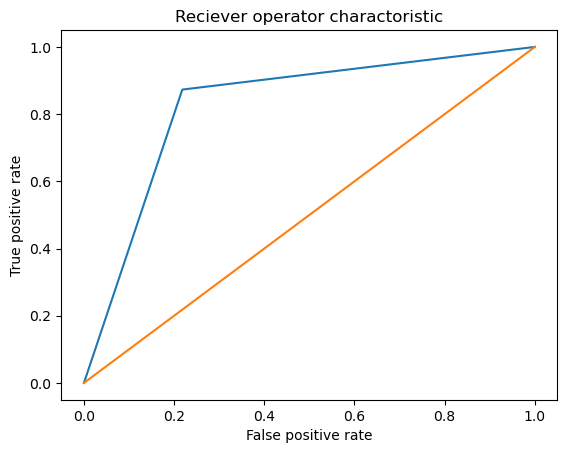

0.8274653833164471


In [305]:
fpr,tpr,threshold=roc_curve(y_test,clf.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,clf.predict(x_test))
print(auc_score)

here with this model i am getting 82% auc score.

In [306]:
#Model No-3 With all the features Except residual sugar-

In [311]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1599 rows x 12 columns]

In [312]:
df.corr().quality

fixed acidity           0.095093
volatile acidity       -0.321441
citric acid             0.159129
residual sugar         -0.002160
chlorides              -0.109494
free sulfur dioxide    -0.061757
total sulfur dioxide   -0.231963
density                -0.159110
pH                     -0.003264
sulphates               0.218072
alcohol                 0.434751
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:>

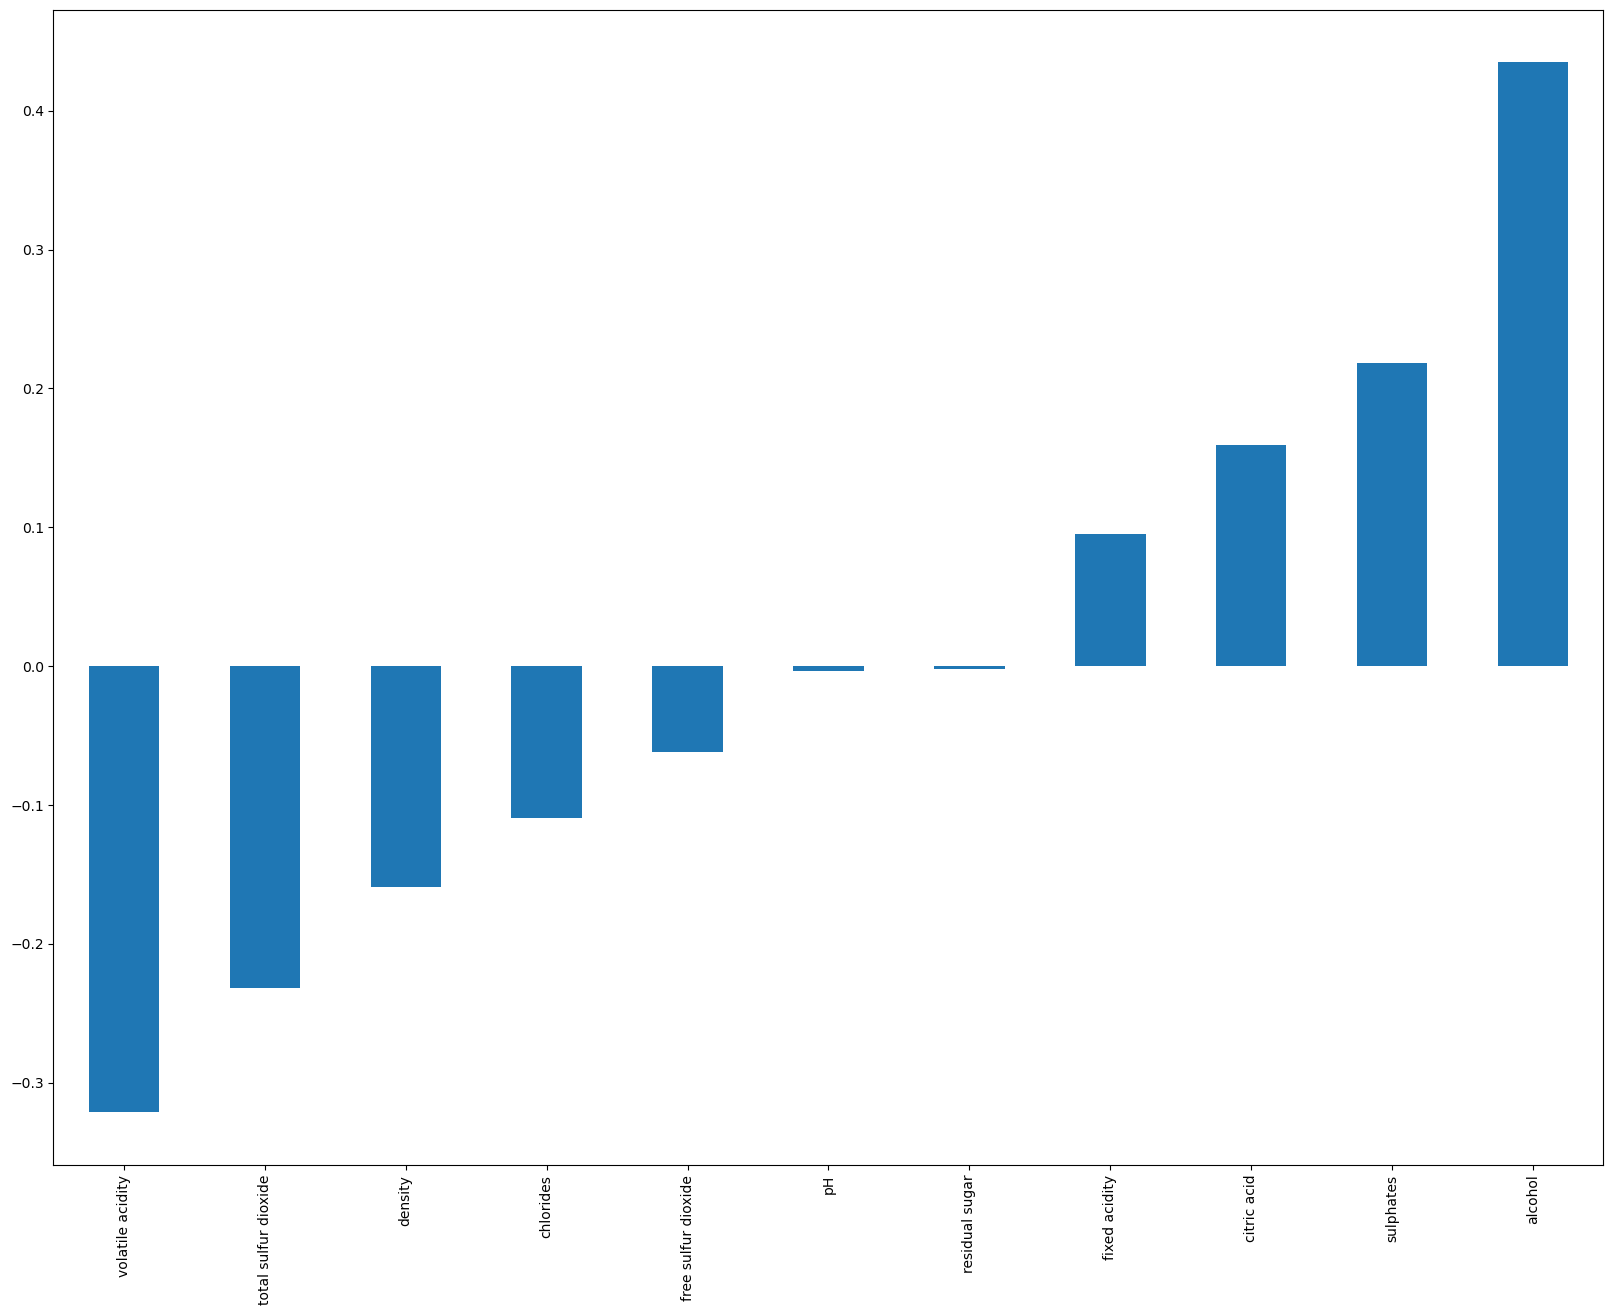

In [313]:
plt.figure(figsize=(20,15))
df.corr().quality.sort_values(ascending=True).drop(['quality']).plot(kind='bar')

In [314]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

Here we can see that residual sugar has very high skewness and very low correlationship with target variable. so we can drop it.

In [315]:
df=df.drop(columns=['residual sugar'],axis=1)
df

fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
...             ...               ...          ...        ...   
1594            6.2             0.600         0.08      0.090   
1595            5.9             0.550         0.10      0.062   
1596            6.3             0.510         0.13      0.076   
1597            5.9             0.645         0.12      0.075   
1598            6.0             0.310         0.47      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1599 rows x 11 columns]

In [316]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                -0.139303
dtype: float64

In [317]:
#lets remove outliers from the above data-

In [318]:
x=df.drop(columns=['quality'])
y=df.quality

In [319]:
from scipy.stats import zscore
import numpy as np

In [320]:
z=np.abs(zscore(x))
z.shape

(1599, 10)

In [321]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   38,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        109,  120,  126,  127,  142,  144,  147,  151,  151,  151,  151,
        169,  169,  181,  199,  226,  226,  240,  243,  244,  258,  258,
        281,  291,  339,  340,  347,  354,  374,  381,  391,  396,  400,
        442,  442,  451,  467,  480,  515,  544,  554,  554,  555,  555,
        557,  557,  568,  584,  588,  591,  608,  614,  636,  639,  649,
        651,  652,  652,  672,  672,  684,  690,  692,  692,  695,  723,
        724,  730,  754,  776,  777,  795,  821,  836,  837,  889,  925,
        926,  982, 1017, 1018, 1051, 1051, 1079, 1081, 1111, 1114, 1131,
       1154, 1165, 1175, 1231, 1244, 1244, 1260, 1269, 1269, 1270, 1270,
       1288, 1289, 1295, 1296, 1299, 1300, 1312, 1316, 1319, 1319, 1321,
       1358, 1367, 1370, 1370, 1372, 1372, 1374, 1434, 1434, 1435, 1435,
       1474, 1474, 1476, 1476, 1493, 1496, 1558, 1

In [322]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(1599, 11)
(1476, 11)


In [323]:
data_loss=((df.shape[0]-df1.shape[0])/df.shape[0])*100
data_loss

7.6923076923076925

In [324]:
df1

fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
...             ...               ...          ...        ...   
1594            6.2             0.600         0.08      0.090   
1595            5.9             0.550         0.10      0.062   
1596            6.3             0.510         0.13      0.076   
1597            5.9             0.645         0.12      0.075   
1598            6.0             0.310         0.47      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1476 rows x 11 columns]

In [325]:
# Removal of skewness-

In [326]:
#Power transformation method-

In [327]:
x=df1.drop(columns=['quality'])
y=df1.quality

In [328]:
from sklearn.preprocessing import PowerTransformer

In [329]:
pt=PowerTransformer(method='yeo-johnson') #internally it uses Yeo-Johnson default if we dont pass anything.

x=pt.fit_transform(x)

In [330]:
x

array([[-0.46282235,  1.04541948, -1.52848674, ...,  1.3635099 ,
        -0.58413175, -1.10538485],
       [-0.16593058,  1.90280515, -1.52848674, ..., -0.82100577,
         0.45947513, -0.52028587],
       [-0.16593058,  1.3446929 , -1.24803869, ..., -0.38431134,
         0.22773303, -0.52028587],
       ...,
       [-1.44584014, -0.00809376, -0.66670982, ...,  0.74715125,
         0.93819572,  0.74695678],
       [-1.88046834,  0.75791527, -0.72819155, ...,  1.76676963,
         0.67463395, -0.02729844],
       [-1.76718473, -1.33656526,  1.07137235, ...,  0.53855156,
         0.306919  ,  0.74695678]])

In [331]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1476, dtype: int64

In [332]:
#Model building-

In [333]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.8510158013544018 at random state 26


In [334]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=maxrs)

In [335]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('/n=====================Train Result=====================')
        print(f'accuracy score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
        
    elif train==False:
        pred=clf.predict(x_test)
        
        print('/n=====================Test Result=====================') 
        print(f'accuracy_score: {accuracy_score(y_test,pred)*100:.2f}%')
        print(f'confusion matrix is: \n{confusion_matrix(y_test,pred)}')
        print('\n\n Test classification report\n', classification_report(y_test,pred,digits=2))

In [336]:
#Logistic regression-

In [345]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [346]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 72.90%
/n=====================Test Result=====================
accuracy_score: 76.15%
confusion matrix is: 
[[132  43]
 [ 45 149]]


 Test classification report
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       175
           1       0.78      0.77      0.77       194

    accuracy                           0.76       369
   macro avg       0.76      0.76      0.76       369
weighted avg       0.76      0.76      0.76       369



for logistic regression train accuracy-72% & test accuracy is-76%

In [348]:
#Random forest-

In [355]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [356]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 84.01%
confusion matrix is: 
[[147  28]
 [ 31 163]]


 Test classification report
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       175
           1       0.85      0.84      0.85       194

    accuracy                           0.84       369
   macro avg       0.84      0.84      0.84       369
weighted avg       0.84      0.84      0.84       369



for random forest train accuracy-100% & test accuracy is 84%

In [357]:
#support vector classifier-

In [358]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [359]:
metric_score(svc,x_train,x_test,y_train,y_test, train=True)
metric_score(svc,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 79.49%
/n=====================Test Result=====================
accuracy_score: 78.59%
confusion matrix is: 
[[136  39]
 [ 40 154]]


 Test classification report
               precision    recall  f1-score   support

           0       0.77      0.78      0.77       175
           1       0.80      0.79      0.80       194

    accuracy                           0.79       369
   macro avg       0.79      0.79      0.79       369
weighted avg       0.79      0.79      0.79       369



for svc train accuracy-79% & test accuracy is-78%

In [360]:
#Gradient boosting classifier-

In [369]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [370]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 86.99%
/n=====================Test Result=====================
accuracy_score: 80.22%
confusion matrix is: 
[[138  37]
 [ 36 158]]


 Test classification report
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       175
           1       0.81      0.81      0.81       194

    accuracy                           0.80       369
   macro avg       0.80      0.80      0.80       369
weighted avg       0.80      0.80      0.80       369



for Gradient boosting classifier train accuracy-86% & test accuracy is-80%

In [371]:
#Adaboost classifier-

In [376]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [377]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 79.67%
/n=====================Test Result=====================
accuracy_score: 76.15%
confusion matrix is: 
[[128  47]
 [ 41 153]]


 Test classification report
               precision    recall  f1-score   support

           0       0.76      0.73      0.74       175
           1       0.77      0.79      0.78       194

    accuracy                           0.76       369
   macro avg       0.76      0.76      0.76       369
weighted avg       0.76      0.76      0.76       369



for adaboost classifier train accuracy-79% & test accuracy is-76%

In [378]:
#Bagging classifier-

In [413]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [414]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 98.83%
/n=====================Test Result=====================
accuracy_score: 80.22%
confusion matrix is: 
[[148  27]
 [ 46 148]]


 Test classification report
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       175
           1       0.85      0.76      0.80       194

    accuracy                           0.80       369
   macro avg       0.80      0.80      0.80       369
weighted avg       0.81      0.80      0.80       369



for Bagging classifier train accuracy-98% & test accuracy is-80%

In [415]:
#Extratreesclassifier-

In [420]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [421]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 84.01%
confusion matrix is: 
[[145  30]
 [ 29 165]]


 Test classification report
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       175
           1       0.85      0.85      0.85       194

    accuracy                           0.84       369
   macro avg       0.84      0.84      0.84       369
weighted avg       0.84      0.84      0.84       369



for Extratreesclassifier train accuracy-100% & test accuracy is-84%

In [422]:
#Decision tree classifier-

In [423]:
from sklearn.tree import DecisionTreeClassifier

In [430]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [431]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 78.32%
confusion matrix is: 
[[131  44]
 [ 36 158]]


 Test classification report
               precision    recall  f1-score   support

           0       0.78      0.75      0.77       175
           1       0.78      0.81      0.80       194

    accuracy                           0.78       369
   macro avg       0.78      0.78      0.78       369
weighted avg       0.78      0.78      0.78       369



for Decisiontreeclassifier train accuracy-100% & test accuracy is-78%

In [432]:
#Cross validation score-

In [433]:
def score(clf,x,y):
    score1=cross_val_score(clf,x,y)
    print(score1)
    print('cross validation score is:-',score1.mean())

In [434]:
#LogisticRegression-

In [435]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [436]:
score(clf,x,y)

[0.65202703 0.70169492 0.79322034 0.71186441 0.73220339]
cross validation score is:- 0.7182020155748969


In [437]:
#Random Forest-

In [438]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [439]:
score(clf,x,y)

[0.65202703 0.70169492 0.77966102 0.72881356 0.68813559]
cross validation score is:- 0.710066422354558


In [440]:
#Support vector Classifier-

In [441]:
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [442]:
score(svc,x,y)

[0.69256757 0.70169492 0.80338983 0.74915254 0.7220339 ]
cross validation score is:- 0.7337677508016491


In [443]:
#GradientBoostingClassifier-

In [444]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [445]:
score(clf,x,y)

[0.68243243 0.70508475 0.73220339 0.72881356 0.75254237]
cross validation score is:- 0.7202153000458085


In [446]:
#Adaboostclassifier-

In [447]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [448]:
score(clf,x,y)

[0.6722973  0.7220339  0.74237288 0.75932203 0.69491525]
cross validation score is:- 0.7181882730187815


In [449]:
#BaggingClassifier-

In [450]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [451]:
score(clf,x,y)

[0.65540541 0.70169492 0.72881356 0.72881356 0.7220339 ]
cross validation score is:- 0.707352267521759


In [452]:
#ExtraTreesClassifier-

In [453]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [454]:
score(clf,x,y)

[0.66554054 0.71525424 0.79322034 0.7220339  0.7220339 ]
cross validation score is:- 0.7236165826843793


In [455]:
#DecisionTreeClassifier-

In [456]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [457]:
score(clf,x,y)

[0.60810811 0.66779661 0.66440678 0.69152542 0.59322034]
cross validation score is:- 0.6450114521300963


Here i am taking gradient boosting classifier as my best model for hyperparameter tunning-

In [458]:
#Hyperparameter tunning-

In [459]:
gb=GradientBoostingClassifier()

In [460]:
param_grid={'criterion':['friedman_mse', 'squared_error'],'loss' : ['deviance', 'exponential'],'n_estimators':[50,100],'learning_rate' :[0.01,0.1],'min_samples_split' :[3,4,5,6],'random_state':[100,1000,200],'min_samples_split':[2,3,4,5],'max_depth':[4,5,6],'max_features' : ['auto', 'sqrt']}

In [461]:
grid_search=GridSearchCV(estimator=gb,param_grid=param_grid,cv=5)

In [226]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100],
                         'random_state': [100, 1000, 200]})

In [228]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 100,
 'random_state': 1000}

In [462]:
clf=GradientBoostingClassifier(criterion= 'friedman_mse',
 learning_rate= 0.1,
 loss= 'exponential',
 max_depth= 6,
 max_features= 'sqrt',
 min_samples_split= 6,
 n_estimators= 100,
 random_state= 1000)

In [463]:
clf.fit(x_train,y_train)

GradientBoostingClassifier(loss='exponential', max_depth=6, max_features='sqrt',
                           min_samples_split=6, random_state=1000)

In [464]:
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

metric_score(clf,x_train,x_test,y_train,y_test, train=False)

/n=====================Train Result=====================
accuracy score: 100.00%
/n=====================Test Result=====================
accuracy_score: 84.55%
confusion matrix is: 
[[144  31]
 [ 26 168]]


 Test classification report
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       175
           1       0.84      0.87      0.85       194

    accuracy                           0.85       369
   macro avg       0.85      0.84      0.84       369
weighted avg       0.85      0.85      0.85       369



accuracy increased to 84%

In [465]:
prediction=clf.predict(x_test)
prediction

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,

In [466]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=prediction
df['original']=a
df

predicted  original
0            0         0
1            0         0
2            1         1
3            1         1
4            0         0
..         ...       ...
364          1         1
365          0         0
366          0         0
367          1         1
368          1         1

[369 rows x 2 columns]

In [467]:
#Roc_curve-

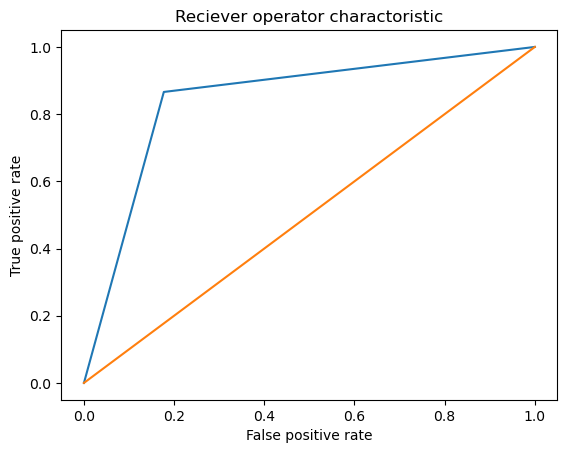

0.844418262150221


In [468]:
fpr,tpr,threshold=roc_curve(y_test,clf.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operator charactoristic')
plt.show()

auc_score=roc_auc_score(y_test,clf.predict(x_test))
print(auc_score)

so here i got the area under the curve is 84% which is quiet good.